# Team information

### Full name
Teodor Barane Lindell

Jonas Olsen

Henrik Log Jacobsen

### Student id
Teodor: 565706

Jonas: 

Henrik: 

### Kaggle team name
Lei-Cheng FC

In [46]:
%load_ext autoreload
%autoreload 2

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

pd.set_option('display.max_columns', 500)

from data_prep import data_manager as DM

# instanciate a new datamanager 
dm = DM.Data_Manager()
dm.data_loader()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# EDA

Exploritary data analysis section. Look at datasets and features with purpose of gaining knowledge about the domain. 

Pre-domain knowledge. 
Going into the task we expected the main predictors of solar power generation would be related to sun exposure. Also, things like cloud, rain, snow or any other weather related to bad weather would be indicators of lower power generation. 

## Data cleanup

First, we look at some statistics about our dataset. We are looking for features that does not provide any information and therefore can be deleted. 

This is benefitial due to a couple of reasons: 
1. our data becomes less complex, and our model does not need to be overly complicated. Simple models can learn the trends and we reduce chances of overfitting.
2. we remove potential nan values, missing values and make the data represent our problem more accuratley. 

## NaN Values

We begin by cleaning up the data in basic ways. 

In [47]:
print("--------------train observed----------------")
print(dm.X_train_observed_a.isnull().sum()[dm.X_train_observed_a.isnull().sum() > 0]/ dm.X_train_observed_a.shape[0])
print("--------------train estimated---------------")
print(dm.X_train_estimated_a.isnull().sum()[dm.X_train_estimated_a.isnull().sum() > 0]/ dm.X_train_estimated_a.shape[0])
print("---------------test estimated---------------")
print(dm.X_test_estimated_a.isnull().sum()[dm.X_test_estimated_a.isnull().sum() > 0]/ dm.X_test_estimated_a.shape[0])

--------------train observed----------------
ceiling_height_agl:m    0.187471
cloud_base_agl:m        0.067971
snow_density:kgm3       0.977045
dtype: float64
--------------train estimated---------------
ceiling_height_agl:m    0.222975
cloud_base_agl:m        0.119140
snow_density:kgm3       0.897189
dtype: float64
---------------test estimated---------------
ceiling_height_agl:m    0.275347
cloud_base_agl:m        0.103472
snow_density:kgm3       1.000000
dtype: float64


In [48]:
print("--------------train observed----------------")
print(dm.X_train_observed_b.isnull().sum()[dm.X_train_observed_b.isnull().sum() > 0]/ dm.X_train_observed_b.shape[0])
print("--------------train estimated---------------")
print(dm.X_train_estimated_b.isnull().sum()[dm.X_train_estimated_b.isnull().sum() > 0]/ dm.X_train_estimated_b.shape[0])
print("---------------test estimated---------------")
print(dm.X_test_estimated_b.isnull().sum()[dm.X_test_estimated_b.isnull().sum() > 0]/ dm.X_test_estimated_b.shape[0])

--------------train observed----------------
ceiling_height_agl:m    0.160542
cloud_base_agl:m        0.063911
snow_density:kgm3       0.951013
dtype: float64
--------------train estimated---------------
ceiling_height_agl:m    0.209888
cloud_base_agl:m        0.111686
snow_density:kgm3       0.894003
dtype: float64
---------------test estimated---------------
ceiling_height_agl:m    0.262153
cloud_base_agl:m        0.096181
snow_density:kgm3       1.000000
dtype: float64


In [49]:
print("--------------train observed----------------")
print(dm.X_train_observed_c.isnull().sum()[dm.X_train_observed_c.isnull().sum() > 0] / dm.X_train_observed_c.shape[0])
print("--------------train estimated---------------")
print(dm.X_train_estimated_c.isnull().sum()[dm.X_train_estimated_c.isnull().sum() > 0] / dm.X_train_estimated_c.shape[0])
print("---------------test estimated---------------")
print(dm.X_test_estimated_c.isnull().sum()[dm.X_test_estimated_c.isnull().sum() > 0] / dm.X_test_estimated_c.shape[0])

--------------train observed----------------
ceiling_height_agl:m    0.170537
cloud_base_agl:m        0.072861
snow_density:kgm3       0.920976
dtype: float64
--------------train estimated---------------
ceiling_height_agl:m    0.261493
cloud_base_agl:m        0.159536
snow_density:kgm3       0.790737
dtype: float64
---------------test estimated---------------
ceiling_height_agl:m    0.294792
cloud_base_agl:m        0.130208
snow_density:kgm3       1.000000
dtype: float64


Can see that all test_estimated sets have 100% of snow density as missing. 
In addidtion, all training sets have high percentage missing snow density, therefore this is removed. 

In [50]:
dm.X_train_observed_a = dm.X_train_observed_a.drop("snow_density:kgm3", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("snow_density:kgm3", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("snow_density:kgm3", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("snow_density:kgm3", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("snow_density:kgm3", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("snow_density:kgm3", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("snow_density:kgm3", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("snow_density:kgm3", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("snow_density:kgm3", axis=1)


## Cloud base and Ceiling height

From dataset website we see that the value -666 is injected when no measurement is possible. We suspect this being the nan values we see, however the high percentage of ceiling_height_agl:m we dont want to inject back -666 for all missing values. We remove this feature because of this uncertanty.  

In [51]:
dm.X_train_observed_a = dm.X_train_observed_a.drop("ceiling_height_agl:m", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("ceiling_height_agl:m", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("ceiling_height_agl:m", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("ceiling_height_agl:m", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("ceiling_height_agl:m", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("ceiling_height_agl:m", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("ceiling_height_agl:m", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("ceiling_height_agl:m", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("ceiling_height_agl:m", axis=1)

We keep cloud_base_agl:m for now, looking into the possibility of it being useful later on. However, to continue witout the missing values we inject -667. 

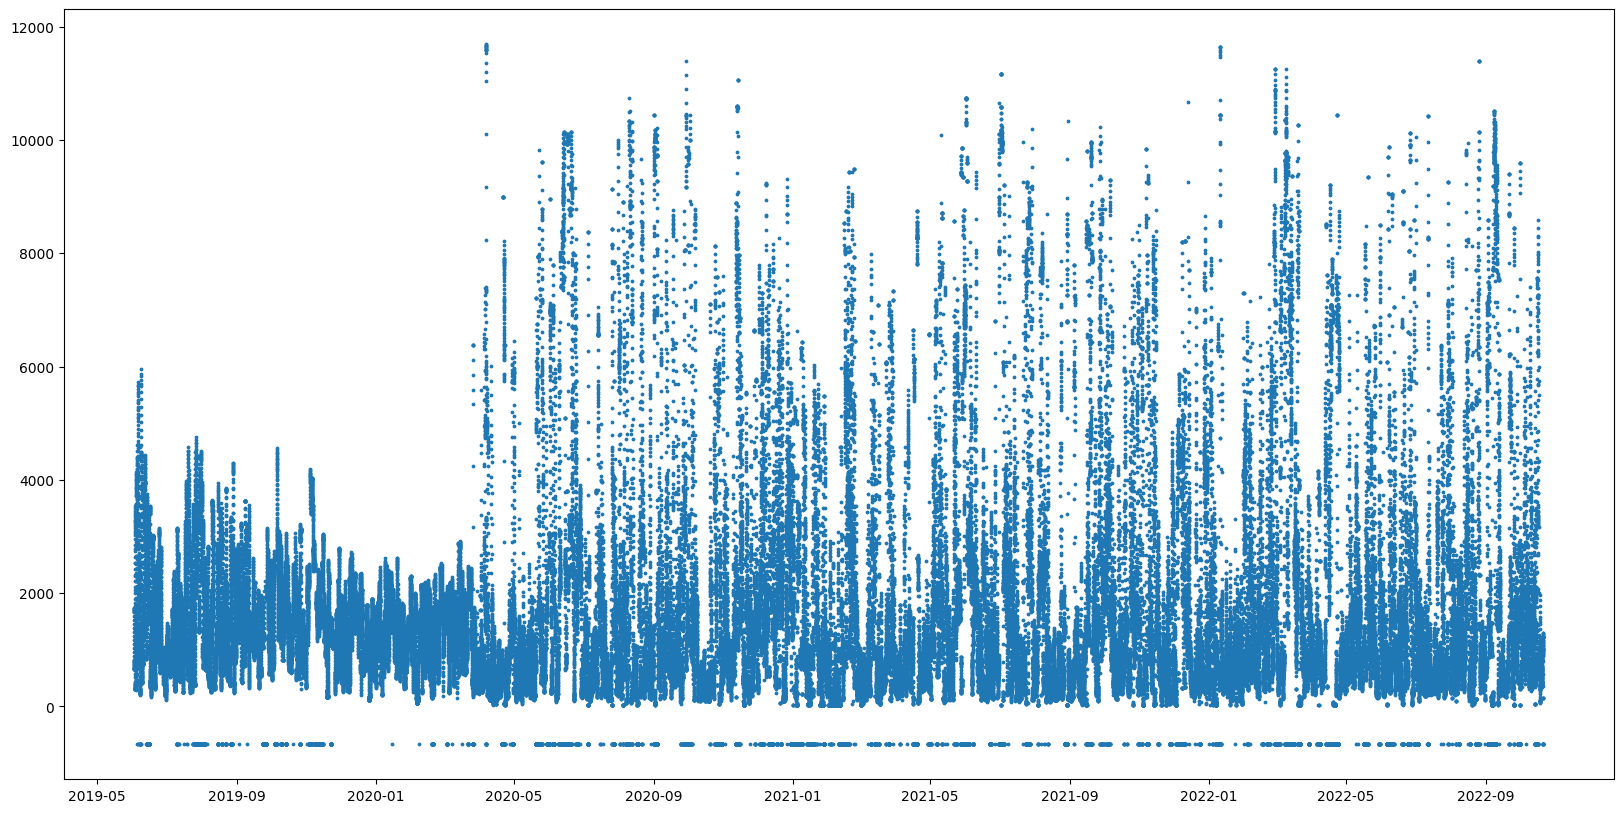

In [52]:

dm.X_train_observed_a["cloud_base_agl:m"][dm.X_train_observed_a["cloud_base_agl:m"].isna()] = -667
dm.X_train_estimated_a["cloud_base_agl:m"][dm.X_train_estimated_a["cloud_base_agl:m"].isna()] = -667
dm.X_test_estimated_a["cloud_base_agl:m"][dm.X_test_estimated_a["cloud_base_agl:m"].isna()] = -667

dm.X_train_observed_b["cloud_base_agl:m"][dm.X_train_observed_b["cloud_base_agl:m"].isna()] = -667
dm.X_train_estimated_b["cloud_base_agl:m"][dm.X_train_estimated_b["cloud_base_agl:m"].isna()] = -667
dm.X_test_estimated_b["cloud_base_agl:m"][dm.X_test_estimated_b["cloud_base_agl:m"].isna()] = -667

dm.X_train_observed_c["cloud_base_agl:m"][dm.X_train_observed_c["cloud_base_agl:m"].isna()] = -667
dm.X_train_estimated_c["cloud_base_agl:m"][dm.X_train_estimated_c["cloud_base_agl:m"].isna()] = -667
dm.X_test_estimated_c["cloud_base_agl:m"][dm.X_test_estimated_c["cloud_base_agl:m"].isna()] = -667


dm.plot_feature(dm.X_train_observed_a, "cloud_base_agl:m")

As we kan see, the row line at the bottom is the injected values. 

We note the sudden change in amplitude

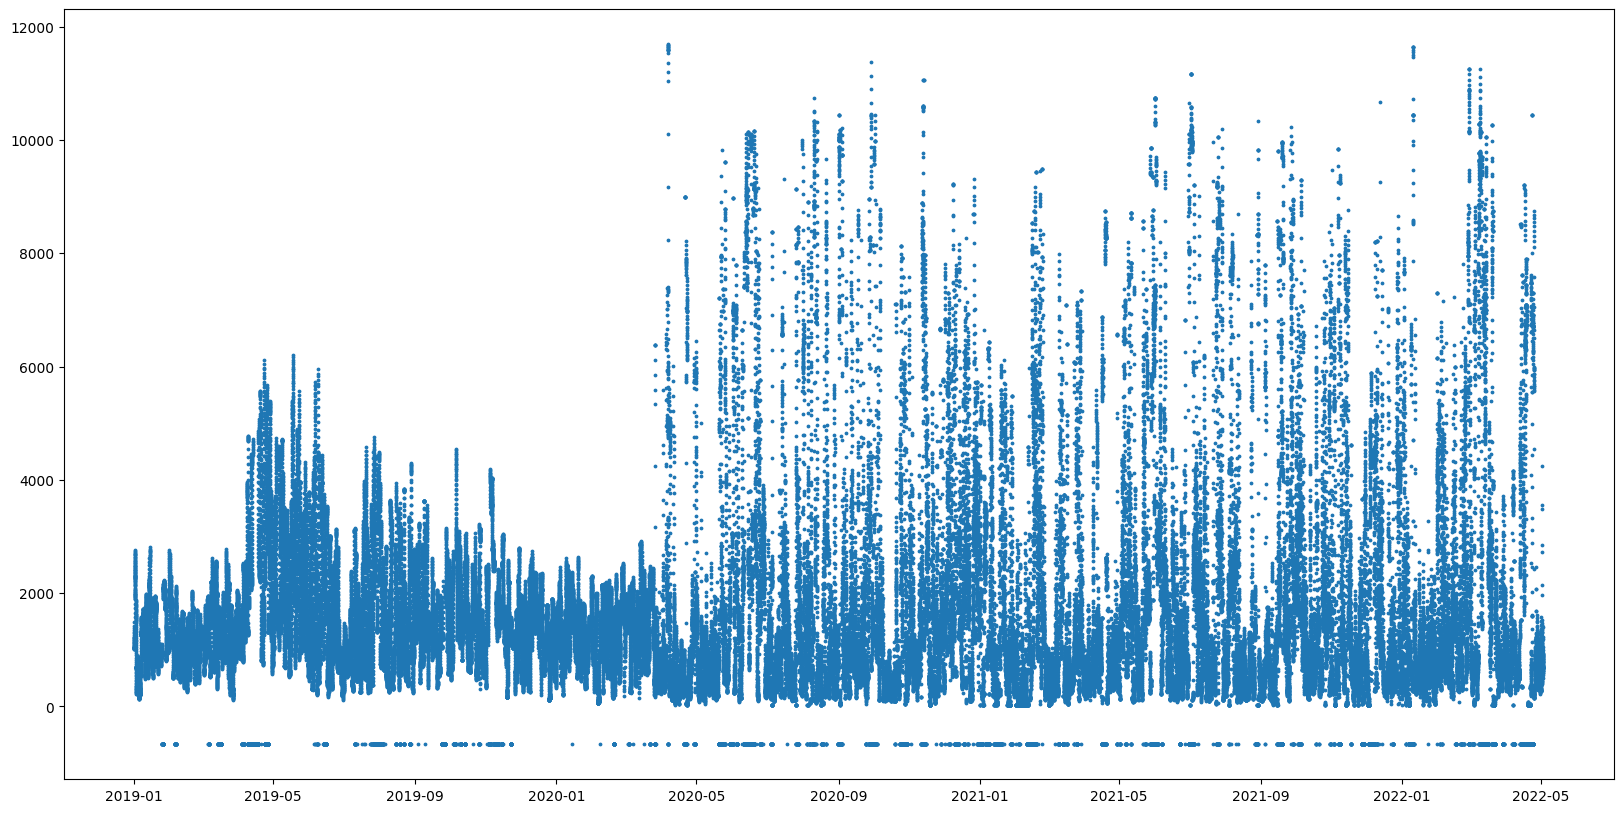

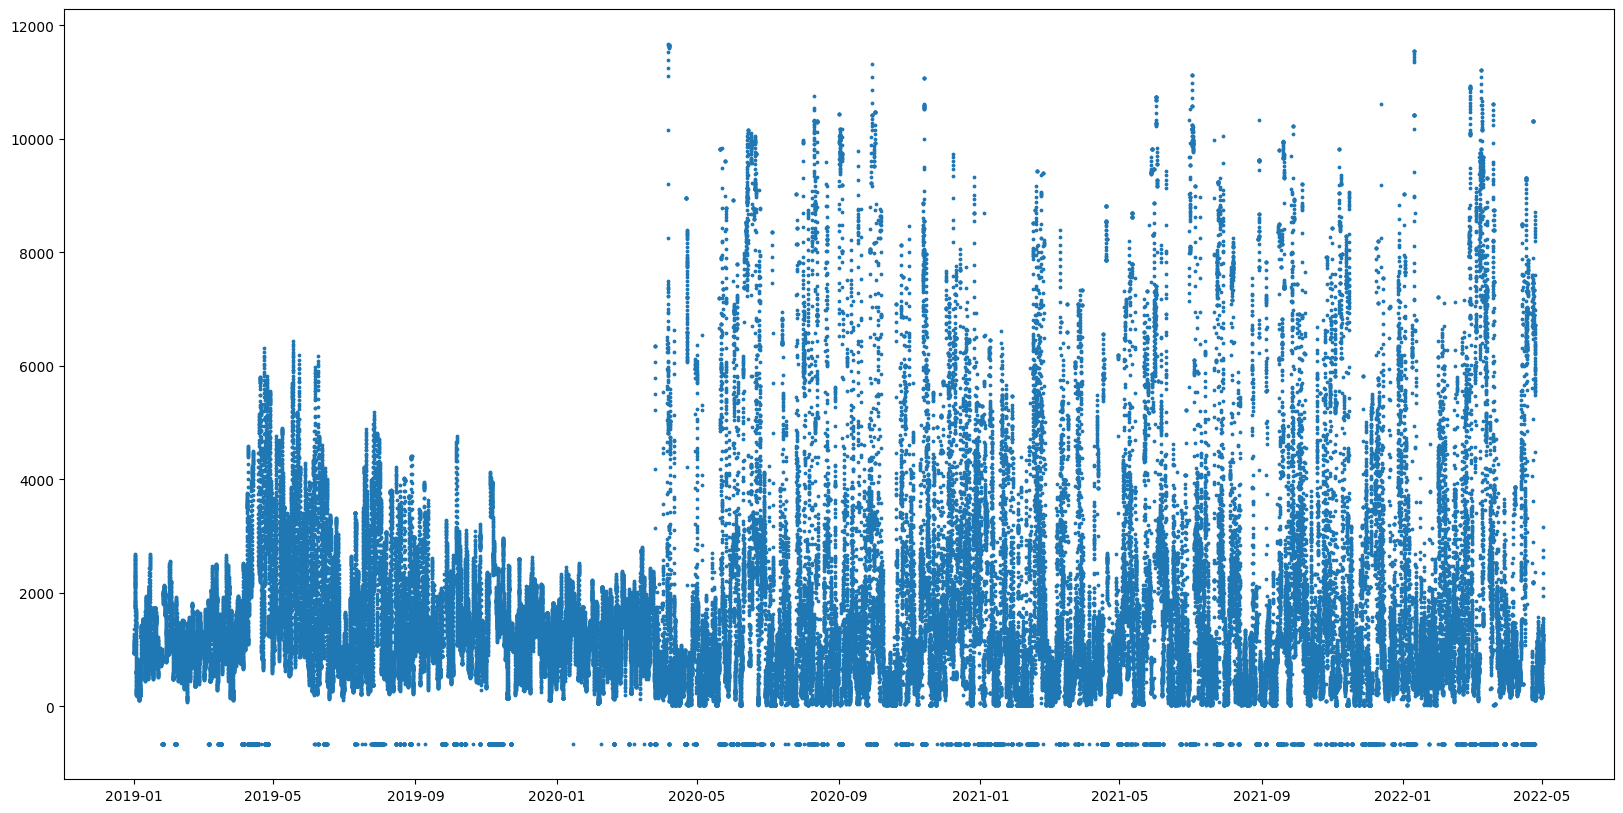

In [53]:
dm.plot_feature(dm.X_train_observed_b, "cloud_base_agl:m")
dm.plot_feature(dm.X_train_observed_c, "cloud_base_agl:m")

We note the amplitude change in all sets happens simultaneously. This could be due to an error, or change of device which result in a different amplitude. Lets try and find the date

<Axes: xlabel='date_forecast'>

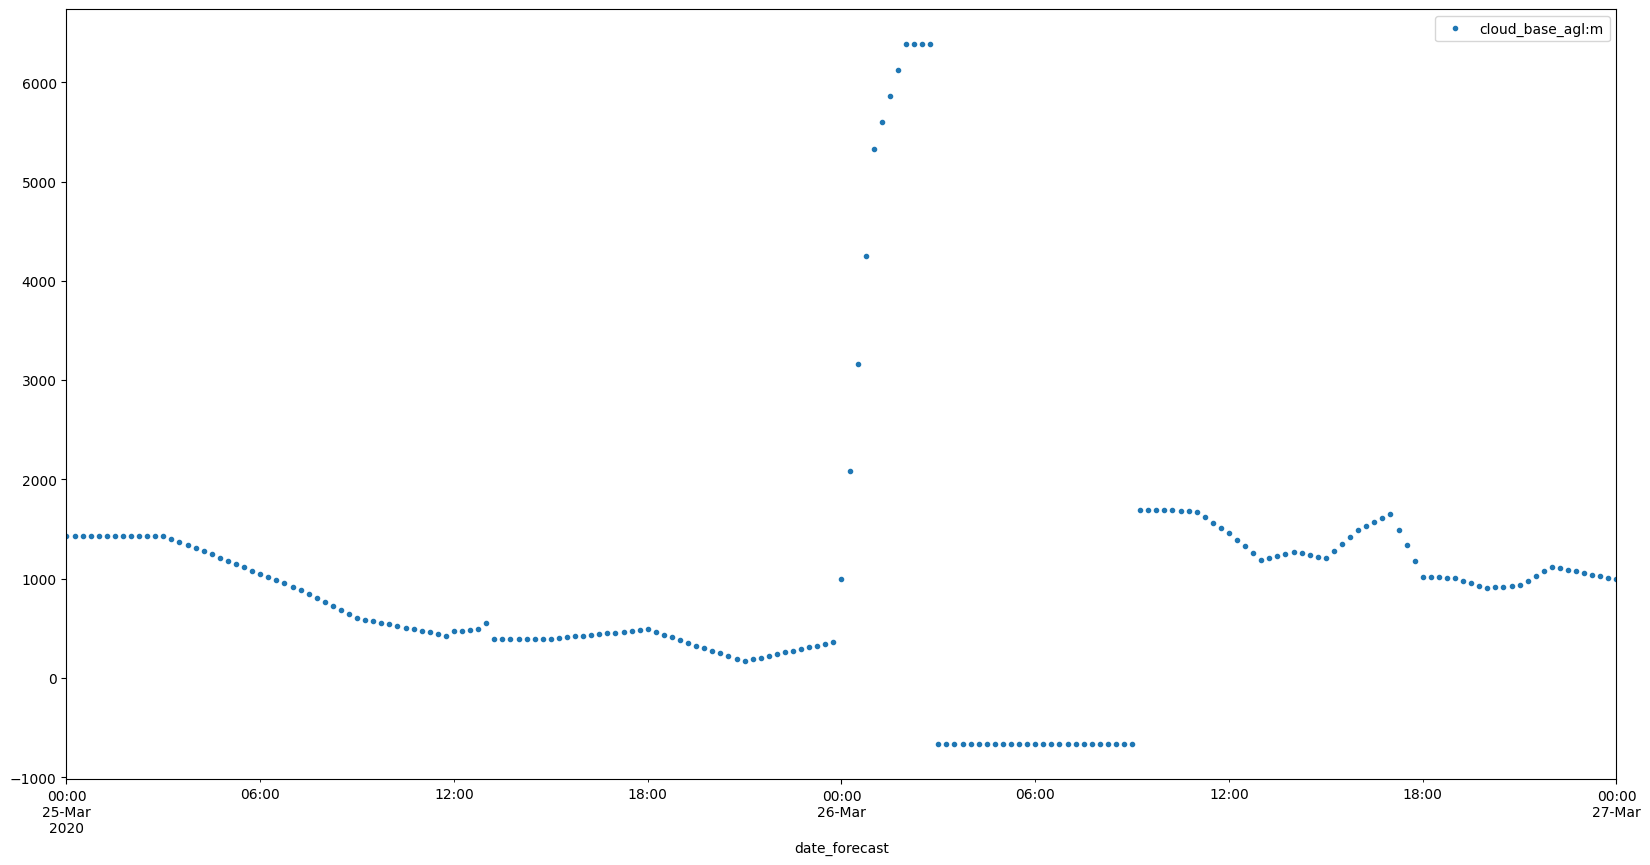

In [54]:
# set the date_forecast interval
start_date = '2020-03-25 00:00:00'
end_date = '2020-03-27 00:00:00'

# filter the data based on the date_forecast interval
data_filtered = dm.X_train_observed_a[(dm.X_train_observed_a['date_forecast'] >= start_date) & (dm.X_train_observed_a['date_forecast'] <= end_date)]

# plot the cloud_base_agl column
data_filtered.plot(x='date_forecast', y='cloud_base_agl:m', figsize=(20,10), style='.')


We denote the date this happens. This is also happening across all sets indicating either a weather phenomenon happening, or something happened to one sensor responsible for all locations measurement. 
We regard the latter as most likely, maybe they switched sensor. 

In [55]:
# We note the turning point
cloud_turning_point = '2020-03-26 00:00:00'

## Looking at columns, what do we need? 

If a column isnt giving us any information about the problem, we can remove for simplicity. 

We look at the amount of 0 in the set. As this does not neccesarily mean no information and must be evaluated on a per-feature basis. 

In [56]:
#observed A zeros
print([dm.X_train_observed_a[dm.X_train_observed_a == 0].count(axis=0)/(dm.X_train_observed_a.shape[0])])

[date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.436946
clear_sky_rad:W                   0.478769
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.963259
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.478954
diffuse_rad_1h:J                  0.436989
direct_rad:W                      0.545231
direct_rad_1h:J                   0.488291
effective_cloud_cover:p           0.031988
elevation:m                       0.000000
fresh_snow_12h:cm                 0.973472
fresh_snow_1h:cm                  0.994009
fresh_snow_24h:cm                 0.954858
fresh_snow_3h:cm                  0.989087
fresh_snow_6h:cm                  0.983627
is_day:idx                        0.478609
is_in_shadow:idx                  0.488350
msl_pressure:hPa                  0.000000
precip_5min:mm                    0.931043
precip_typ

In [57]:
#estimated A zeros
print([dm.X_train_estimated_a[dm.X_train_estimated_a == 0].count(axis=0)/(dm.X_train_estimated_a.shape[0])])

[date_calc                         0.000000
date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.609126
clear_sky_rad:W                   0.650888
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.950842
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.651001
diffuse_rad_1h:J                  0.609126
direct_rad:W                      0.726900
direct_rad_1h:J                   0.680189
effective_cloud_cover:p           0.054563
elevation:m                       0.000000
fresh_snow_12h:cm                 0.839213
fresh_snow_1h:cm                  0.953232
fresh_snow_24h:cm                 0.771734
fresh_snow_3h:cm                  0.922849
fresh_snow_6h:cm                  0.888769
is_day:idx                        0.650774
is_in_shadow:idx                  0.304620
msl_pressure:hPa                  0.000000
precip_5mi

In [58]:
#test A zeros
print([dm.X_test_estimated_a[dm.X_test_estimated_a == 0].count(axis=0)/(dm.X_test_estimated_a.shape[0])])

[date_calc                         0.000000
date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.164583
clear_sky_rad:W                   0.206597
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.965278
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.206944
diffuse_rad_1h:J                  0.164583
direct_rad:W                      0.293403
direct_rad_1h:J                   0.225694
effective_cloud_cover:p           0.047569
elevation:m                       0.000000
fresh_snow_12h:cm                 0.999306
fresh_snow_1h:cm                  0.999653
fresh_snow_24h:cm                 0.999306
fresh_snow_3h:cm                  0.999306
fresh_snow_6h:cm                  0.999306
is_day:idx                        0.206250
is_in_shadow:idx                  0.774653
msl_pressure:hPa                  0.000000
precip_5mi

In [59]:
#observed B zeros
print([dm.X_train_observed_b[dm.X_train_observed_b == 0].count(axis=0)/(dm.X_train_observed_b.shape[0])]) 

[date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.463025
clear_sky_rad:W                   0.504870
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.986163
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.504999
diffuse_rad_1h:J                  0.463050
direct_rad:W                      0.567703
direct_rad_1h:J                   0.514150
effective_cloud_cover:p           0.037074
elevation:m                       0.000000
fresh_snow_12h:cm                 0.962824
fresh_snow_1h:cm                  0.990114
fresh_snow_24h:cm                 0.940562
fresh_snow_3h:cm                  0.983460
fresh_snow_6h:cm                  0.976037
is_day:idx                        0.504691
is_in_shadow:idx                  0.461340
msl_pressure:hPa                  0.000000
precip_5min:mm                    0.945180
precip_typ

In [60]:
#estimated B zeros
print([dm.X_train_estimated_b[dm.X_train_estimated_b == 0].count(axis=0)/(dm.X_train_estimated_b.shape[0])]) 

[date_calc                         0.000000
date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.609183
clear_sky_rad:W                   0.650888
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.976730
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.651001
diffuse_rad_1h:J                  0.609183
direct_rad:W                      0.725990
direct_rad_1h:J                   0.678880
effective_cloud_cover:p           0.055132
elevation:m                       0.000000
fresh_snow_12h:cm                 0.848657
fresh_snow_1h:cm                  0.958807
fresh_snow_24h:cm                 0.786299
fresh_snow_3h:cm                  0.928994
fresh_snow_6h:cm                  0.894743
is_day:idx                        0.650831
is_in_shadow:idx                  0.305701
msl_pressure:hPa                  0.000000
precip_5mi

In [61]:
#test B zeros
print([dm.X_test_estimated_b[dm.X_test_estimated_b == 0].count(axis=0)/(dm.X_test_estimated_b.shape[0])]) 

[date_calc                         0.000000
date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.164583
clear_sky_rad:W                   0.206597
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.972222
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.206944
diffuse_rad_1h:J                  0.164583
direct_rad:W                      0.294444
direct_rad_1h:J                   0.229514
effective_cloud_cover:p           0.047569
elevation:m                       0.000000
fresh_snow_12h:cm                 1.000000
fresh_snow_1h:cm                  1.000000
fresh_snow_24h:cm                 1.000000
fresh_snow_3h:cm                  1.000000
fresh_snow_6h:cm                  1.000000
is_day:idx                        0.206250
is_in_shadow:idx                  0.774306
msl_pressure:hPa                  0.000000
precip_5mi

In [62]:
#observed C zeros
print([dm.X_train_observed_c[dm.X_train_observed_c == 0].count(axis=0)/(dm.X_train_observed_c.shape[0])])

[date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.463111
clear_sky_rad:W                   0.504883
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.863591
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.505106
diffuse_rad_1h:J                  0.463163
direct_rad:W                      0.606146
direct_rad_1h:J                   0.552168
effective_cloud_cover:p           0.042183
elevation:m                       0.000000
fresh_snow_12h:cm                 0.917398
fresh_snow_1h:cm                  0.978172
fresh_snow_24h:cm                 0.871971
fresh_snow_3h:cm                  0.962945
fresh_snow_6h:cm                  0.945876
is_day:idx                        0.504781
is_in_shadow:idx                  0.416597
msl_pressure:hPa                  0.000000
precip_5min:mm                    0.944181
precip_typ

In [63]:
#estimated C zeros
print([dm.X_train_estimated_c[dm.X_train_estimated_c == 0].count(axis=0)/(dm.X_train_estimated_c.shape[0])])

[date_calc                         0.000000
date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.608898
clear_sky_rad:W                   0.650546
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.824135
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.650717
diffuse_rad_1h:J                  0.608898
direct_rad:W                      0.765760
direct_rad_1h:J                   0.716488
effective_cloud_cover:p           0.057294
elevation:m                       0.000000
fresh_snow_12h:cm                 0.765020
fresh_snow_1h:cm                  0.925637
fresh_snow_24h:cm                 0.676263
fresh_snow_3h:cm                  0.882909
fresh_snow_6h:cm                  0.835970
is_day:idx                        0.650546
is_in_shadow:idx                  0.259331
msl_pressure:hPa                  0.000000
precip_5mi

In [64]:
#test C zeros
print([dm.X_test_estimated_c[dm.X_test_estimated_c == 0].count(axis=0)/(dm.X_test_estimated_c.shape[0])])

[date_calc                         0.000000
date_forecast                     0.000000
absolute_humidity_2m:gm3          0.000000
air_density_2m:kgm3               0.000000
clear_sky_energy_1h:J             0.165278
clear_sky_rad:W                   0.206944
cloud_base_agl:m                  0.000000
dew_or_rime:idx                   0.947222
dew_point_2m:K                    0.000000
diffuse_rad:W                     0.207986
diffuse_rad_1h:J                  0.165972
direct_rad:W                      0.334375
direct_rad_1h:J                   0.269792
effective_cloud_cover:p           0.059028
elevation:m                       0.000000
fresh_snow_12h:cm                 0.997569
fresh_snow_1h:cm                  0.997569
fresh_snow_24h:cm                 0.997569
fresh_snow_3h:cm                  0.997569
fresh_snow_6h:cm                  0.997569
is_day:idx                        0.206944
is_in_shadow:idx                  0.727431
msl_pressure:hPa                  0.000000
precip_5mi

As we can see, alot of features have a high percentage of zero values. This needs to be investigate further in order to see if it makes intuitive sense. 

Categorical features can carry information even with high amount of zero values. Features such as is_day:idx have about 50% 0, and this makes sense as 50% of the time its day. However, features like snow_drift:idx which is almost always zero, carries alot less information. This type of analysis is carried out below. 

### Date calculated

The estimated sets have a date_calculated column to indicate the date the prediction of the weather was made. This column could be used to make a feature indicating how certain/ uncertain we are in the prediction our model makes. 

For now we remove, but keep in mind

In [65]:
dm.X_train_estimated_a = dm.X_train_estimated_a.drop("date_calc", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("date_calc", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("date_calc", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("date_calc", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("date_calc", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("date_calc", axis=1)

### Snow

We see that snow_drift:idx only contains 0 value. This is a categorical feature, with 0 indicating no snow amount is being carried. 

Combining with the high percentage of 0 values with the other snow variables, we see that there is not much snow prevalent in the dataset. This is very clear when looking at the fresh snow parameters, where the lowest value is 95% of all rows having 0 value, fresh_snow_24h:cm

For now we keep the 12h and 24h fresh snow feats (given these had the lowest amount of 0). And we keep the snow_water:kgm2 as this is most likely strongly correlated to snow_melt_10min:mm, whilst having alot fewer zeros. 

Although categorical features give information even though at zero, when everything is zero no information is carried

In [66]:
dm.X_train_observed_a = dm.X_train_observed_a.drop("fresh_snow_1h:cm", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("fresh_snow_1h:cm", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("fresh_snow_1h:cm", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("fresh_snow_1h:cm", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("fresh_snow_1h:cm", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("fresh_snow_1h:cm", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("fresh_snow_1h:cm", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("fresh_snow_1h:cm", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("fresh_snow_1h:cm", axis=1)

dm.X_train_observed_a = dm.X_train_observed_a.drop("fresh_snow_3h:cm", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("fresh_snow_3h:cm", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("fresh_snow_3h:cm", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("fresh_snow_3h:cm", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("fresh_snow_3h:cm", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("fresh_snow_3h:cm", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("fresh_snow_3h:cm", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("fresh_snow_3h:cm", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("fresh_snow_3h:cm", axis=1)

dm.X_train_observed_a = dm.X_train_observed_a.drop("fresh_snow_6h:cm", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("fresh_snow_6h:cm", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("fresh_snow_6h:cm", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("fresh_snow_6h:cm", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("fresh_snow_6h:cm", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("fresh_snow_6h:cm", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("fresh_snow_6h:cm", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("fresh_snow_6h:cm", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("fresh_snow_6h:cm", axis=1)

dm.X_train_observed_a = dm.X_train_observed_a.drop("snow_depth:cm", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("snow_depth:cm", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("snow_depth:cm", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("snow_depth:cm", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("snow_depth:cm", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("snow_depth:cm", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("snow_depth:cm", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("snow_depth:cm", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("snow_depth:cm", axis=1)

dm.X_train_observed_a = dm.X_train_observed_a.drop("snow_drift:idx", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("snow_drift:idx", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("snow_drift:idx", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("snow_drift:idx", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("snow_drift:idx", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("snow_drift:idx", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("snow_drift:idx", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("snow_drift:idx", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("snow_drift:idx", axis=1)

dm.X_train_observed_a = dm.X_train_observed_a.drop("snow_melt_10min:mm", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("snow_melt_10min:mm", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("snow_melt_10min:mm", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("snow_melt_10min:mm", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("snow_melt_10min:mm", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("snow_melt_10min:mm", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("snow_melt_10min:mm", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("snow_melt_10min:mm", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("snow_melt_10min:mm", axis=1)

### Wind speed

Looking at wind speed features, the one from W is almost all zeros (>98% for all sets). Its difficult to say if wind speeds are important to our predictions, as its more a predicter of weather than of power generation. However, it could help us gain information about clouds or such, sinse these often are correlated in the real world. 

We investigate further

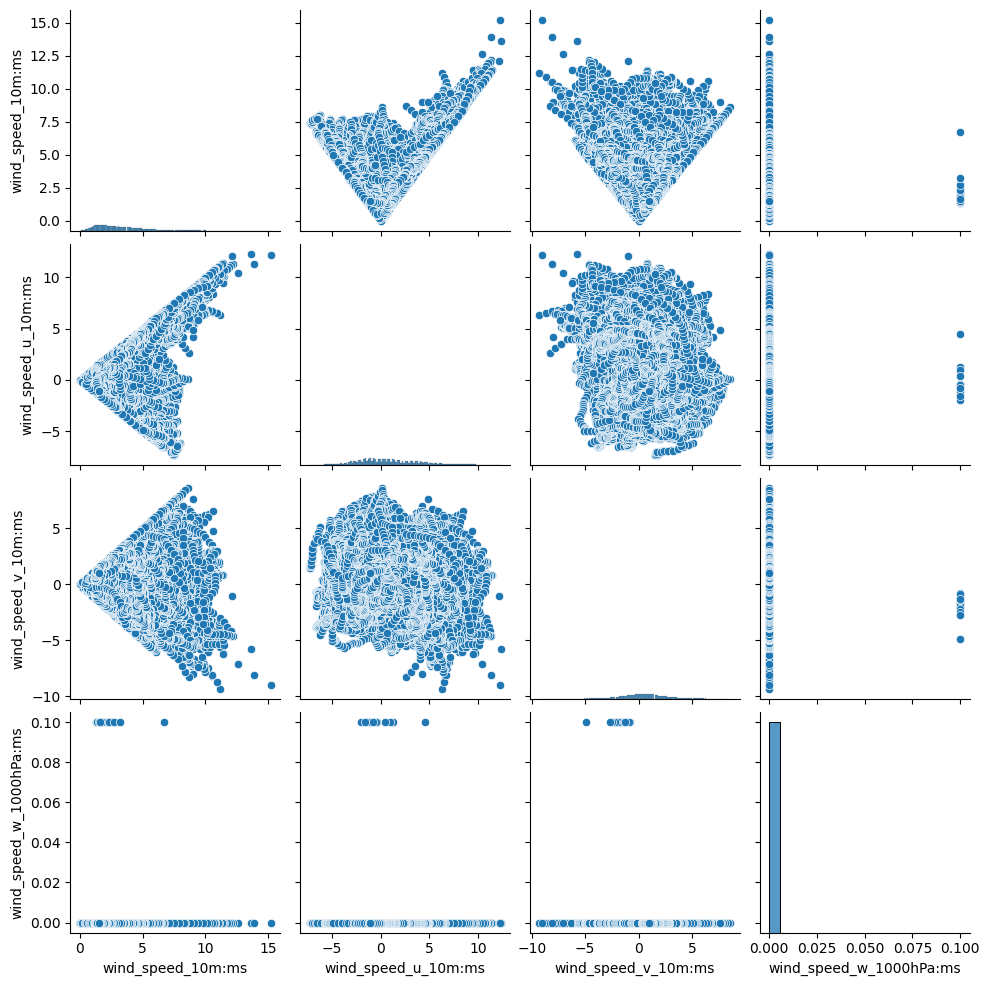

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data=dm.X_train_observed_a[dm.X_train_observed_a.columns.intersection(["wind_speed_10m:ms", "wind_speed_w_1000hPa:ms", "wind_speed_u_10m:ms", "wind_speed_v_10m:ms"])])

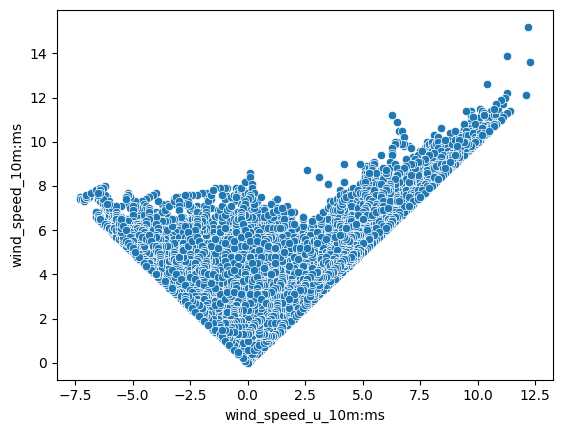

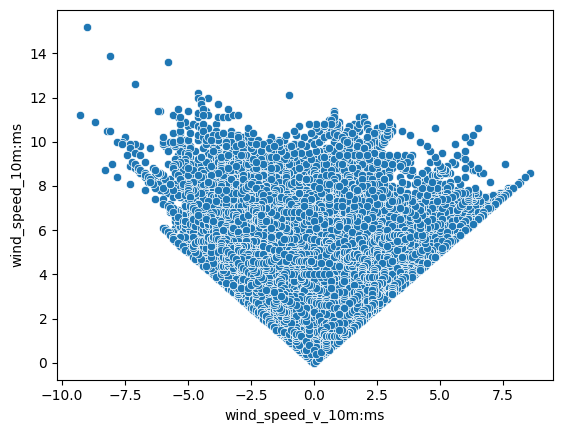

<Axes: xlabel='wind_speed_w_1000hPa:ms', ylabel='wind_speed_10m:ms'>

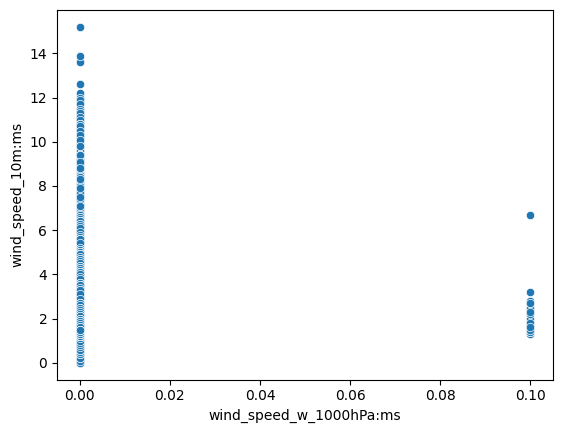

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=dm.X_train_observed_a["wind_speed_u_10m:ms"], y=dm.X_train_observed_a["wind_speed_10m:ms"])
plt.show()
sns.scatterplot(x=dm.X_train_observed_a["wind_speed_v_10m:ms"], y=dm.X_train_observed_a["wind_speed_10m:ms"])
plt.show()
sns.scatterplot(x=dm.X_train_observed_a["wind_speed_w_1000hPa:ms"], y=dm.X_train_observed_a["wind_speed_10m:ms"])

wind v indicates south -> north flow

wind u indicate west -> east flow

wind w indicate vertical wind, here at 1000hPa, we can drop this one as its both only zero values across all datasets (almost), and is not on the same format or amplitude as the previous two. 

The north/south and west/est flows are strongly correlated with the overall wind speed. We need to look into if the direction affects the measured pv in any way. Its probably redundant data, but we keep for now and remove later if needed. 

In [69]:
dm.X_train_observed_a = dm.X_train_observed_a.drop("wind_speed_w_1000hPa:ms", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("wind_speed_w_1000hPa:ms", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("wind_speed_w_1000hPa:ms", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("wind_speed_w_1000hPa:ms", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("wind_speed_w_1000hPa:ms", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("wind_speed_w_1000hPa:ms", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("wind_speed_w_1000hPa:ms", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("wind_speed_w_1000hPa:ms", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("wind_speed_w_1000hPa:ms", axis=1)


### Precip

Both the precip features (precip_type:idx, precip_type_5min:mm) contain mostly zero values. Again these are categorical. The 0 value indicates no type of downfall, again pointing to low amount of rain (and snow). Its now higly likely we are in some dry, sunny place with low amounts of downfall, and harldy any snow. And this makes sense due to the task being about solar panels. 

Anyways, we can see that the low amount of precip being anything other than zero is reflected in both the snow downfall and the rain_water:kgm2 features. 

Dont know how to handle for now, so we move on

### Elevation

As elevation is constant we remove it. Does not seem to correlate to pv_measurement as A has much higher values whilst being at lower altitude. Also, B is closer to A in altitude but closer to C in pv amplitude. 

In [70]:
dm.X_train_observed_a = dm.X_train_observed_a.drop("elevation:m", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("elevation:m", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("elevation:m", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("elevation:m", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("elevation:m", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("elevation:m", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("elevation:m", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("elevation:m", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("elevation:m", axis=1)

### Similarities between of features

Many features are very similar. We expect that remove duplica features will help in reducing model complexity and improve runtime. Some examples of similar features are preassure features and humidity features:

In [71]:
def MAE_similarity_rating(f1, f2, name1, name2):
    print(name1," & ",name2," MAE: ", mean_absolute_error(f1, f2))

def MSE_similarity_rating(f1, f2, name1, name2):
    print(name1," & ",name2," MSE: ", mean_squared_error(f1, f2))

In [72]:
full_A = pd.concat([dm.X_train_observed_a, dm.X_train_estimated_a, dm.X_test_estimated_a], ignore_index=True)
full_B = pd.concat([dm.X_train_observed_b, dm.X_train_estimated_b, dm.X_test_estimated_b], ignore_index=True)
full_C = pd.concat([dm.X_train_observed_c, dm.X_train_estimated_c, dm.X_test_estimated_c], ignore_index=True)

# Humidity group of features
preassure_features = [
    'pressure_100m:hPa',
    'pressure_50m:hPa',
    'msl_pressure:hPa',
    'sfc_pressure:hPa',
]

for f1 in preassure_features:
    for f2 in preassure_features:
        MAE_similarity_rating(full_A[f1], full_A[f2], f1, f2)

print()
for f1 in preassure_features:
    for f2 in preassure_features:
        MSE_similarity_rating(full_A[f1], full_A[f2], f1, f2)

pressure_100m:hPa  &  pressure_100m:hPa  MAE:  0.0
pressure_100m:hPa  &  pressure_50m:hPa  MAE:  6.119862
pressure_100m:hPa  &  msl_pressure:hPa  MAE:  12.898134
pressure_100m:hPa  &  sfc_pressure:hPa  MAE:  12.266925
pressure_50m:hPa  &  pressure_100m:hPa  MAE:  6.119862
pressure_50m:hPa  &  pressure_50m:hPa  MAE:  0.0
pressure_50m:hPa  &  msl_pressure:hPa  MAE:  6.778272
pressure_50m:hPa  &  sfc_pressure:hPa  MAE:  6.147063
msl_pressure:hPa  &  pressure_100m:hPa  MAE:  12.898134
msl_pressure:hPa  &  pressure_50m:hPa  MAE:  6.778272
msl_pressure:hPa  &  msl_pressure:hPa  MAE:  0.0
msl_pressure:hPa  &  sfc_pressure:hPa  MAE:  0.63120943
sfc_pressure:hPa  &  pressure_100m:hPa  MAE:  12.266925
sfc_pressure:hPa  &  pressure_50m:hPa  MAE:  6.147063
sfc_pressure:hPa  &  msl_pressure:hPa  MAE:  0.63120943
sfc_pressure:hPa  &  sfc_pressure:hPa  MAE:  0.0

pressure_100m:hPa  &  pressure_100m:hPa  MSE:  0.0
pressure_100m:hPa  &  pressure_50m:hPa  MSE:  37.482246
pressure_100m:hPa  &  msl_pressu

We observe that the preassure features are very simliar, so we must consider dropping some of them or creating features that are the numerical difference between them.

In [73]:
# Humidity group of features

humidity_features = [
    'absolute_humidity_2m:gm3',
    'relative_humidity_1000hPa:p'
]



for f1 in humidity_features:
    for f2 in humidity_features:
        MAE_similarity_rating(full_A[f1], full_A[f2], f1, f2)

print()
for f1 in humidity_features:
    for f2 in humidity_features:
        MSE_similarity_rating(full_A[f1], full_A[f2], f1, f2)

absolute_humidity_2m:gm3  &  absolute_humidity_2m:gm3  MAE:  0.0
absolute_humidity_2m:gm3  &  relative_humidity_1000hPa:p  MAE:  67.59634
relative_humidity_1000hPa:p  &  absolute_humidity_2m:gm3  MAE:  67.59634
relative_humidity_1000hPa:p  &  relative_humidity_1000hPa:p  MAE:  0.0

absolute_humidity_2m:gm3  &  absolute_humidity_2m:gm3  MSE:  0.0
absolute_humidity_2m:gm3  &  relative_humidity_1000hPa:p  MSE:  4759.282
relative_humidity_1000hPa:p  &  absolute_humidity_2m:gm3  MSE:  4759.282
relative_humidity_1000hPa:p  &  relative_humidity_1000hPa:p  MSE:  0.0


We observe that there in fact is some variation in the features. It can be worth creating features that show the interaction between them. We certainly will not drop one of them here.

## Sample rates, Aggregation

To make predictions, we need to make data appear on the same frequency. For us this means reducing the weather data from a per 15min sample rate to a per hour basis. This is because pv_measurement is sampled at an hourly rate.

How to do this is not immediatly obvious. Some features in our data makes sense to average over the last hour, getting to the right frequency. However, not all of them do. For instance, direct_rad is measured as an instantanious value at every 15min, for us this equates to us taking the mean over the past four rows. 

The is_day:idx however does not make sense to do this with, as its indicating wether or not its day. This has a value of 0 - 1 and averaging could make this become any of 0, 0.25, 0.5, 0.75, 1. 

When aggregating we therefore split into three categories. 1. Summation features, 2. mean features, 3. categorical features. 

In [74]:

def resample(df:pd.DataFrame): 

    categorical_feature = ["date_forecast", "is_day:idx", "is_in_shadow:idx", "clear_sky_energy_1h:J", "diffuse_rad_1h:J", "direct_rad_1h:J", "fresh_snow_12h:cm", "fresh_snow_24h:cm"]

    categorical_set = df.loc[:, categorical_feature][::4].copy()

    resampled_set = df.resample('1H', on="date_forecast").agg({"precip_5min:mm":np.sum, "rain_water:kgm2":np.sum, "snow_water:kgm2":np.sum, "super_cooled_liquid_water:kgm2":np.mean, 
                                                                "absolute_humidity_2m:gm3":np.mean, "air_density_2m:kgm3":np.mean, "clear_sky_rad:W":np.mean, "dew_point_2m:K":np.mean, "clear_sky_rad:W":np.mean, "diffuse_rad:W":np.mean, "direct_rad:W":np.mean, "effective_cloud_cover:p":np.mean, "msl_pressure:hPa":np.mean, "pressure_100m:hPa":np.mean, "pressure_50m:hPa":np.mean, "relative_humidity_1000hPa:p":np.mean, "sfc_pressure:hPa":np.mean, "sun_azimuth:d":np.mean, "sun_elevation:d":np.mean, "t_1000hPa:K":np.mean, "total_cloud_cover:p":np.mean, "visibility:m":np.mean, "wind_speed_10m:ms":np.mean, "wind_speed_u_10m:ms":np.mean, "wind_speed_v_10m:ms":np.mean, "cloud_base_agl:m":np.mean}).copy()

    combined = pd.merge(categorical_set, resampled_set, how="left", on="date_forecast")
    
    return combined

dm.X_train_observed_a = resample(dm.X_train_observed_a)
dm.X_train_observed_b = resample(dm.X_train_observed_b)
dm.X_train_observed_c = resample(dm.X_train_observed_c)

dm.X_train_estimated_a = resample(dm.X_train_estimated_a)
dm.X_train_estimated_b = resample(dm.X_train_estimated_b)
dm.X_train_estimated_c = resample(dm.X_train_estimated_c)

dm.X_test_estimated_a = resample(dm.X_test_estimated_a)
dm.X_test_estimated_b = resample(dm.X_test_estimated_b)
dm.X_test_estimated_c = resample(dm.X_test_estimated_c)



In [75]:
print(dm.X_test_estimated_a.shape)

(720, 33)


## Combining datasets 

We now combine datasets to make it easier to do feature engineering and look at features role. 

In [76]:
def combine(obs:pd.DataFrame, es:pd.DataFrame, train:pd.DataFrame): 
    weather_data = pd.concat([obs, es], axis=0)

    data = pd.merge(weather_data, train, how="left", on="date_forecast").dropna().reset_index(drop=True)

    return data

dm.data_A = combine(dm.X_train_observed_a, dm.X_train_estimated_a, dm.train_a)
dm.data_B = combine(dm.X_train_observed_b, dm.X_train_estimated_b, dm.train_b)
dm.data_C = combine(dm.X_train_observed_c, dm.X_train_estimated_c, dm.train_c)


## Constant intervals

Plotting PV measurements for A B C shows some constant intervals. These would relate feature values with some (often wrong) measured pv value. We remove these.

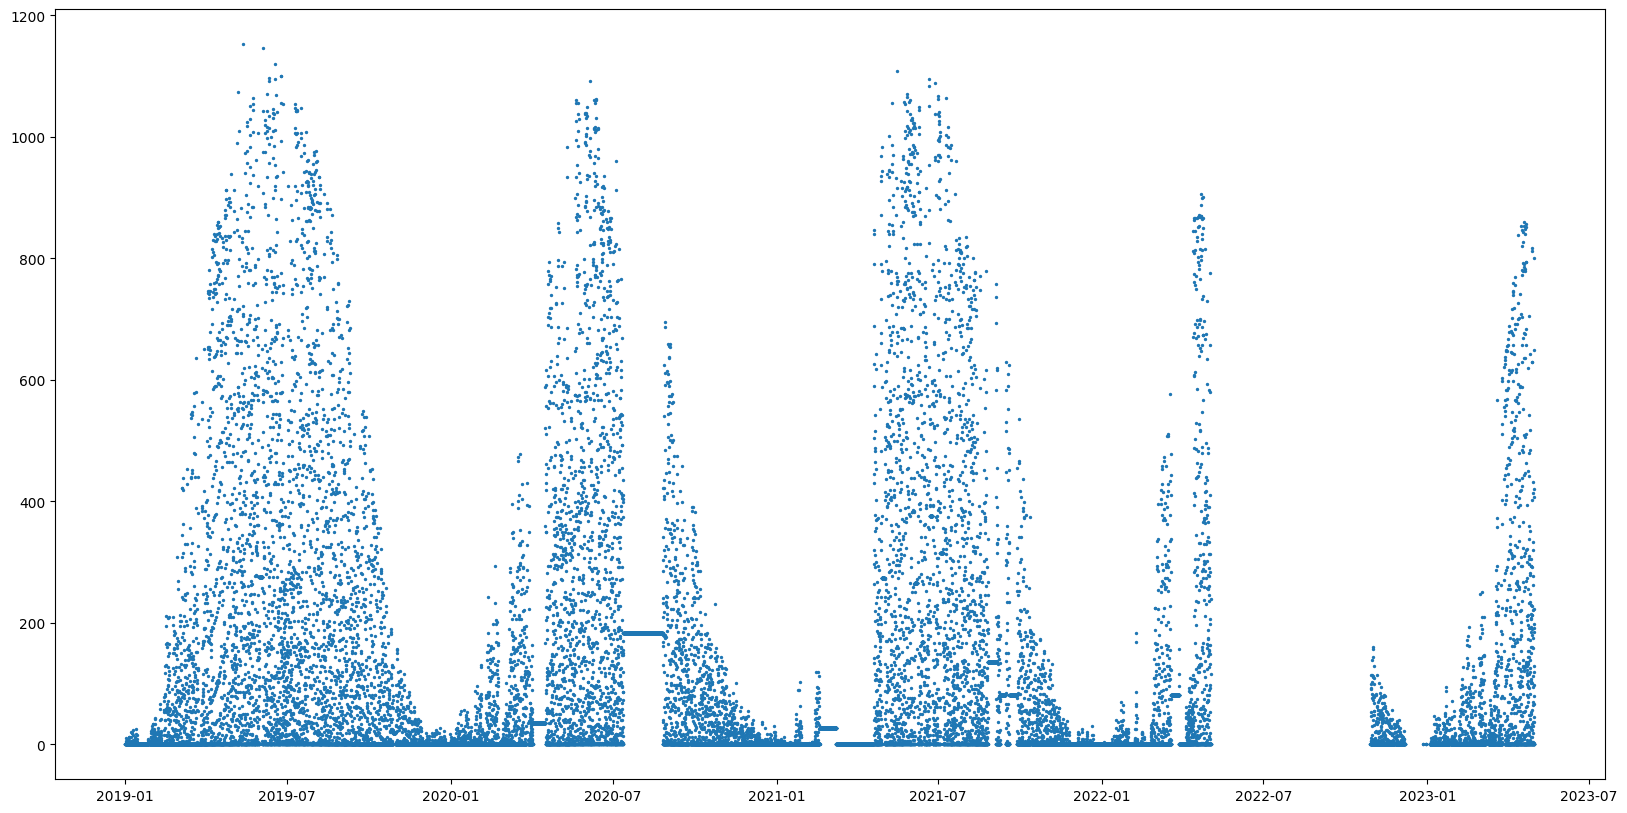

In [77]:
fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.scatter(dm.data_B["date_forecast"], dm.data_B["pv_measurement"], s=2)


In [78]:
val = None
counter = 0
consequtive_zero_threshold = 23
threshold = 0.0

def remove_const_intervals(row):
    global val
    global counter
    global consequtive_zero_threshold

    if val is None: # init val as row 
        val = row
        return False

    elif val == 0.0: ## if the current value is 0.0 

        counter += 1 ## we count this 

        if counter >= consequtive_zero_threshold: ## number of seen consequtive zeros are above threshold
            val = row
            counter += 1
            return False
        
        else: 
            val = row
            return True ## we have not yet gone past threshold

    elif abs(row-val)<= threshold: ## we see a value (not zero) if below threshold we remove, this also indicates a break in any streak of zeros, setting counter to zero
        val = row
        counter = 0
        return False
    
    counter = 0
    val = row
    return True ## if all else fails, we keep the row. 


dm.data_A = dm.data_A[dm.data_A['pv_measurement'].map(remove_const_intervals)].reset_index(drop=True)
dm.data_B = dm.data_B[dm.data_B['pv_measurement'].map(remove_const_intervals)].reset_index(drop=True)
dm.data_C = dm.data_C[dm.data_C['pv_measurement'].map(remove_const_intervals)].reset_index(drop=True)


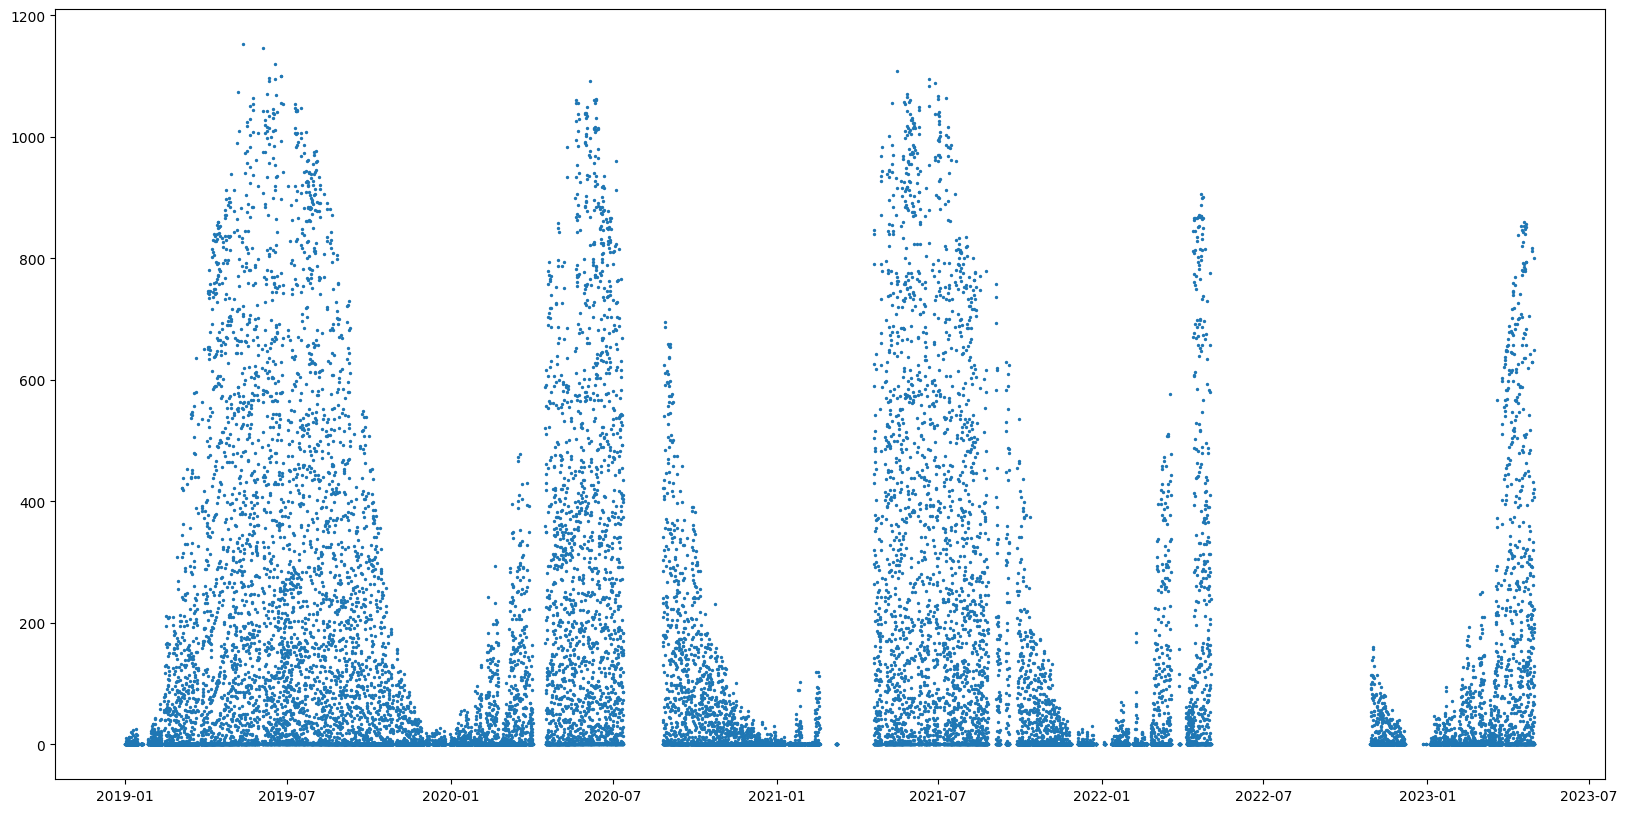

In [79]:
fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.scatter(dm.data_B["date_forecast"], dm.data_B["pv_measurement"], s=2)


## BC Donation

(KEEP OR NOT?) When removing constant intervals we loose a chunk of our data. As B and C are close in scale we want to see if its possible for B to fill in missing values to C and vice versa. 

First, its important that the features indicating a pv value are equal, otherwise this wont make sense to our models. We check this by simply looking at the percentage difference between each feature in B and C. 

In [80]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

common_dates = set(dm.data_B["date_forecast"])
common_dates = common_dates.intersection(dm.data_C["date_forecast"])

B = dm.data_B[dm.data_B["date_forecast"].isin(common_dates)]
C = dm.data_C[dm.data_C["date_forecast"].isin(common_dates)]


for feat in dm.data_B.columns: 
    if feat != "date_forecast": 
        print(f"{feat} ----> ", mean_absolute_error(B[feat], C[feat]))

is_day:idx ---->  0.00023137436
is_in_shadow:idx ---->  0.043903284
clear_sky_energy_1h:J ---->  651.7786
diffuse_rad_1h:J ---->  3659.76
direct_rad_1h:J ---->  7932.5137
fresh_snow_12h:cm ---->  0.11151666
fresh_snow_24h:cm ---->  0.20908722
precip_5min:mm ---->  0.003908491
rain_water:kgm2 ---->  0.003754049
snow_water:kgm2 ---->  0.030124942
super_cooled_liquid_water:kgm2 ---->  0.007035227
absolute_humidity_2m:gm3 ---->  0.1761511
air_density_2m:kgm3 ---->  0.003360409
clear_sky_rad:W ---->  0.18120374
dew_point_2m:K ---->  0.47791088
diffuse_rad:W ---->  1.1121355
direct_rad:W ---->  2.3469577
effective_cloud_cover:p ---->  2.1160412
msl_pressure:hPa ---->  0.124552995
pressure_100m:hPa ---->  2.4456513
pressure_50m:hPa ---->  2.453093
relative_humidity_1000hPa:p ---->  1.1974057
sfc_pressure:hPa ---->  2.4607432
sun_azimuth:d ---->  0.014941968
sun_elevation:d ---->  0.02373593
t_1000hPa:K ---->  0.15785514
total_cloud_cover:p ---->  1.9231532
visibility:m ---->  1869.9951
wind_s

As we can see, there are differences in the predictors we expect to be important, like radiation. We decided not to proceed with donating between B and C any further. 

In [81]:
dm.data_B.shape

(26583, 34)

In [82]:
dm.data_C.shape

(21393, 34)

In [83]:

# def donate_missing_pv(donating:pd.DataFrame, recieving:pd.DataFrame, scaling:float=1):
    
#     recieving_frame = recieving.copy()

#     recieving_dates = np.array(recieving_frame["date_forecast"])
#     beginning_date = recieving_dates[0]

#     for index, row in donating.iterrows():

#         if row["date_forecast"] not in recieving_dates and row["date_forecast"] > beginning_date: 

#             row = row
#             if row["pv_measurement"] == 0.0 or row["pv_measurement"] == -0.0: 
#                 pv = 0.0

#             else : 
#                 pv = row["pv_measurement"] * scaling


#             row["pv_measurement"] = pv

#             recieving_frame.loc[len(recieving_frame.index)] = row 

    
#     return recieving_frame.sort_values(by="date_forecast", ascending=True).reset_index(drop=True)

# data_B = donate_missing_pv(dm.data_C, dm.data_B, 1.2)
# data_C = donate_missing_pv(dm.data_B, dm.data_C, 0.8)


In [84]:
# dm.data_B = data_B
# dm.data_C = data_C

In [85]:
%store dm

Stored 'dm' (Data_Manager)


## Cleaning up features

When having measured data, there could be alot of random noise that gets introduced to the signal. This could be due to many reasons, however it could throw our model off. So we want to check if any of our features have some statistical outliers, that we can remove. 

We begin by looking at feature by feature distributions.

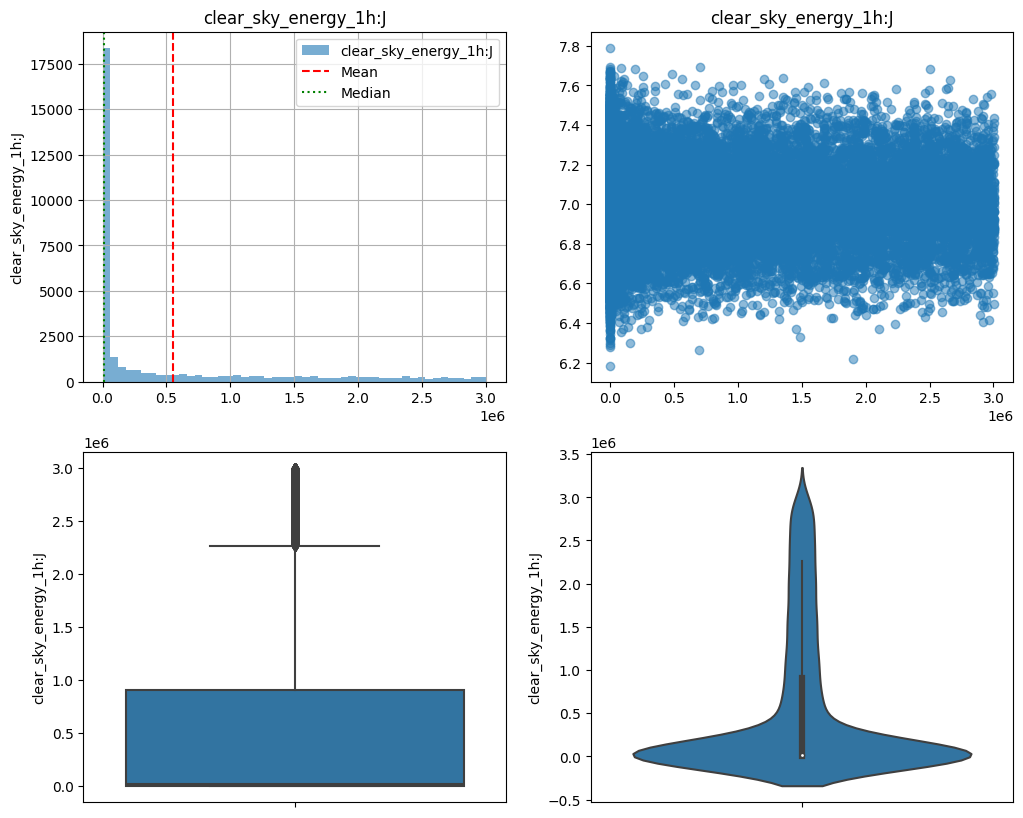

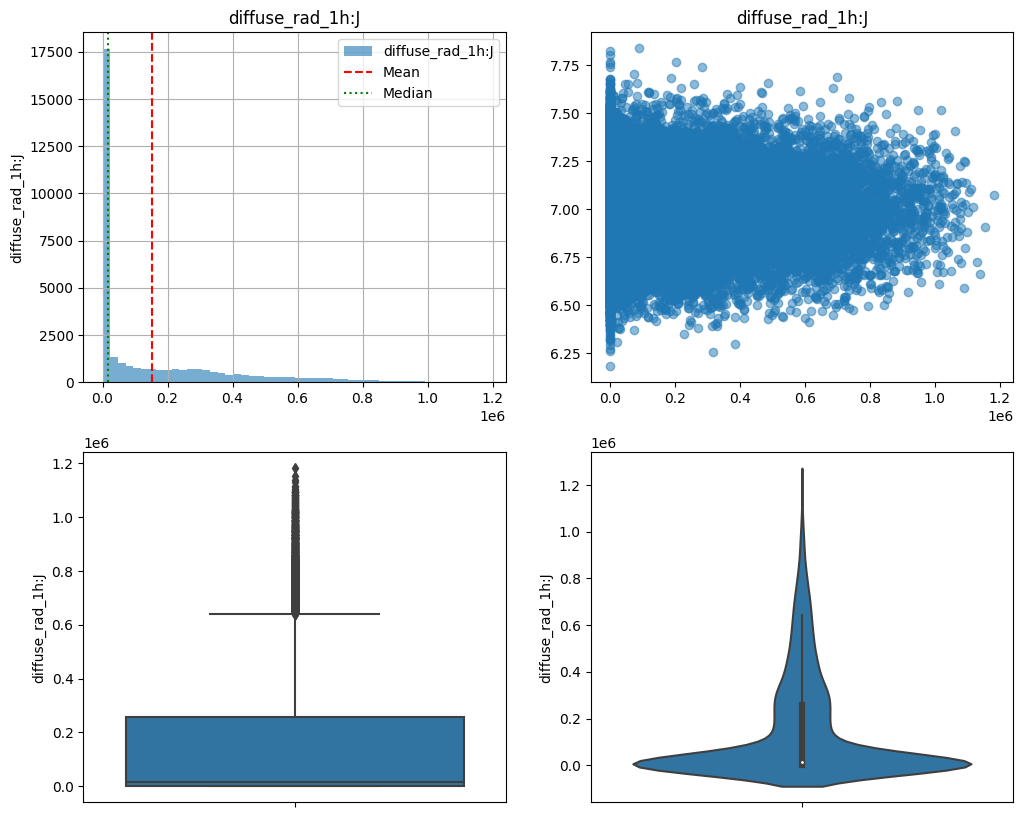

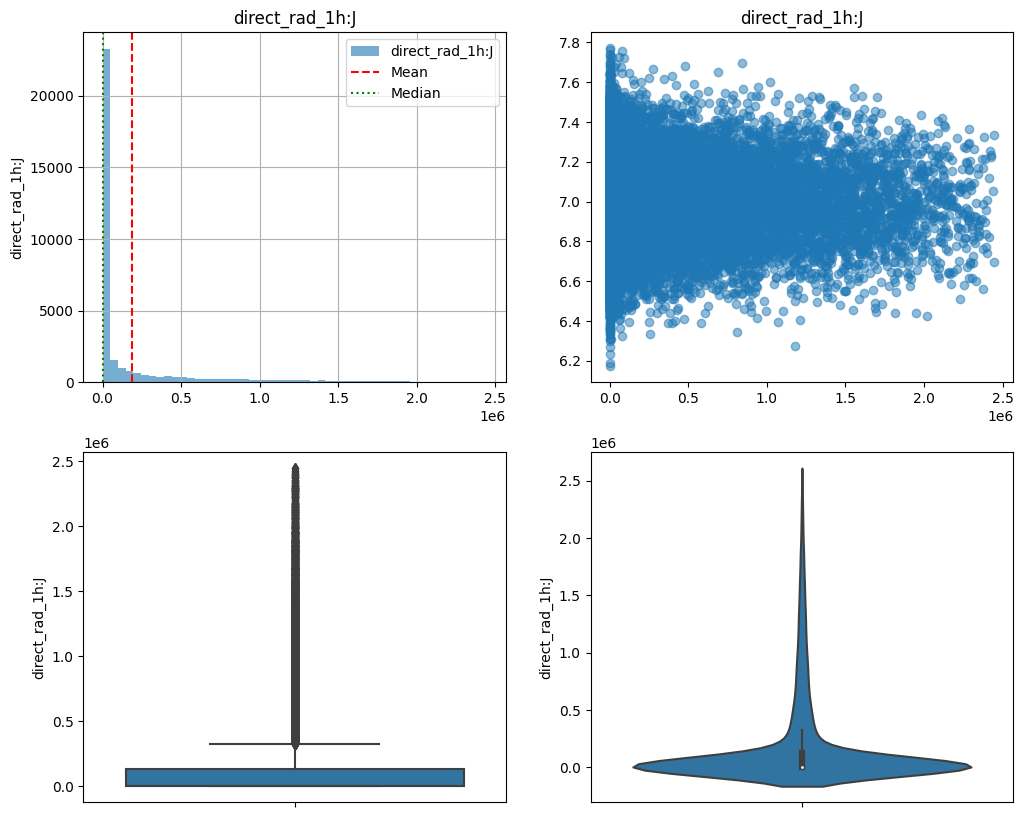

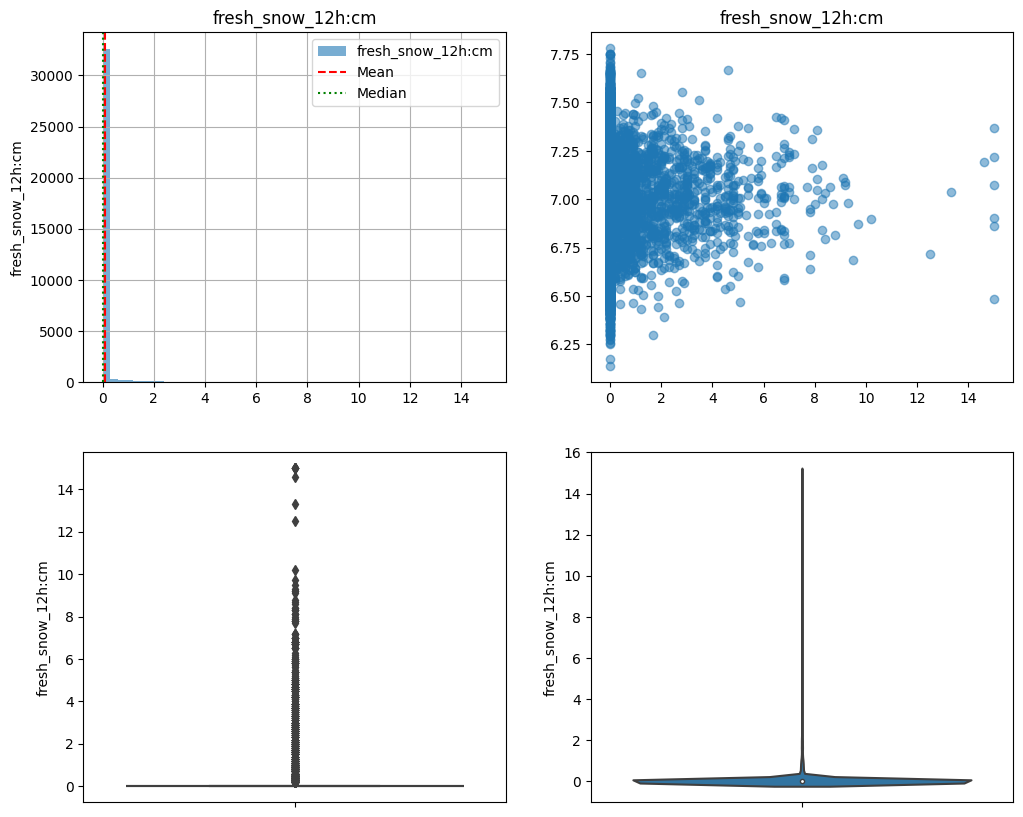

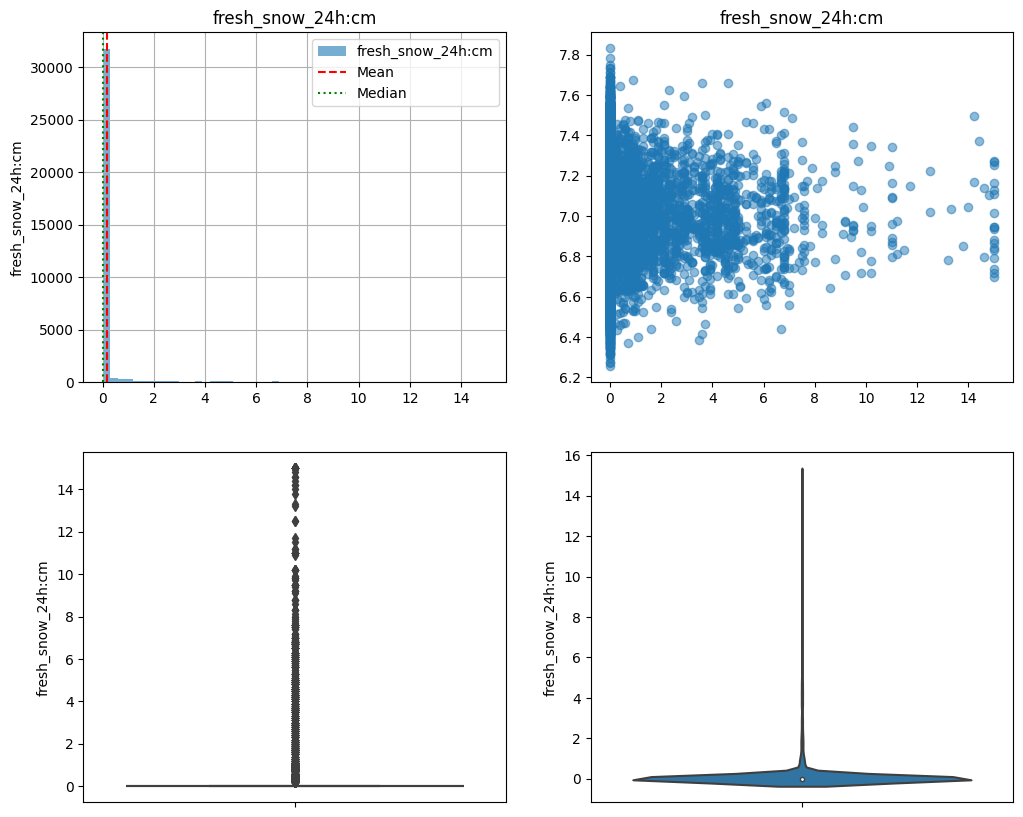

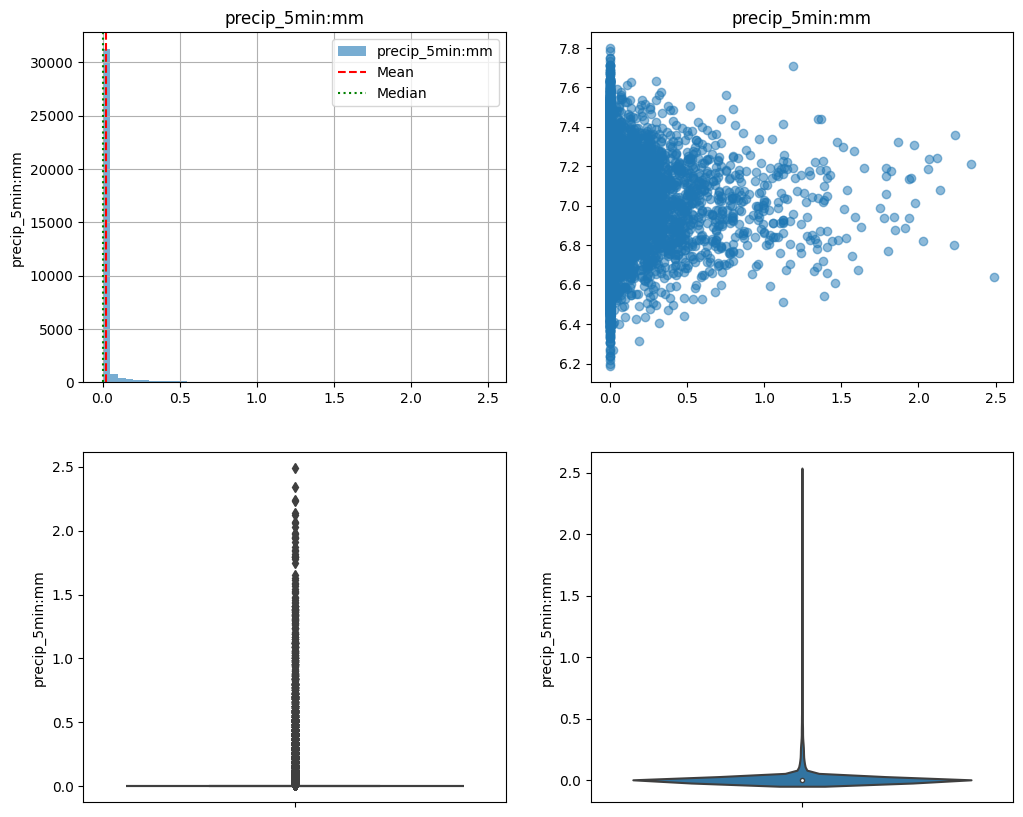

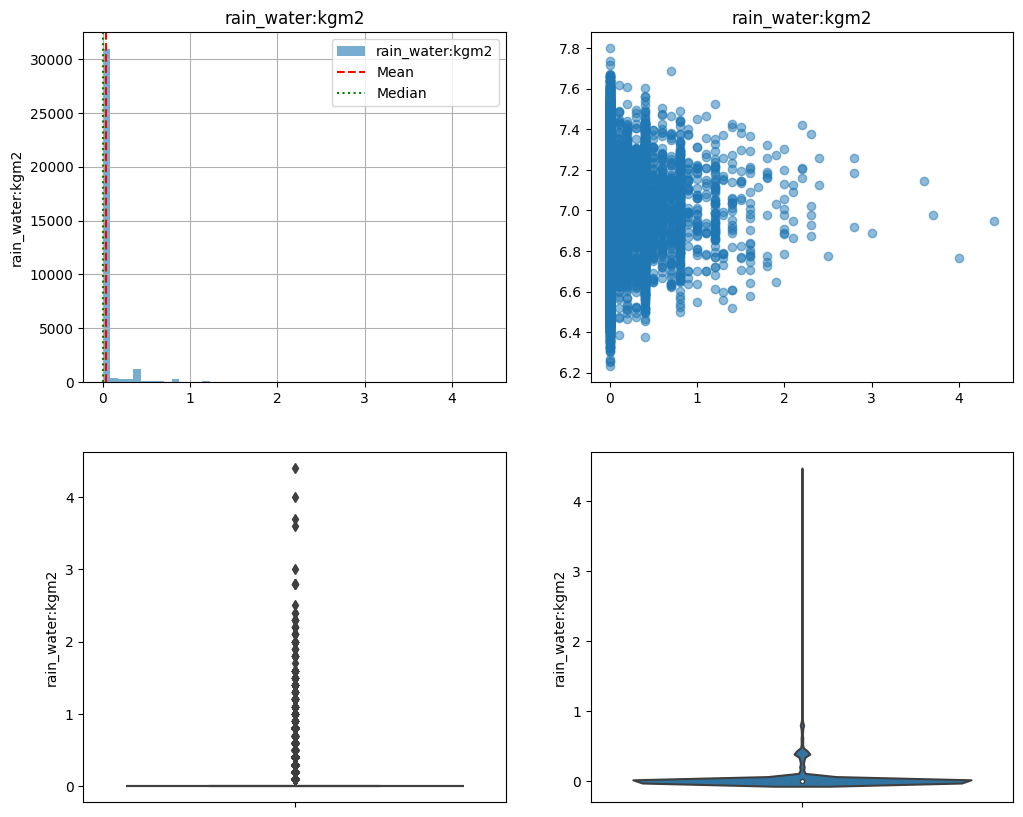

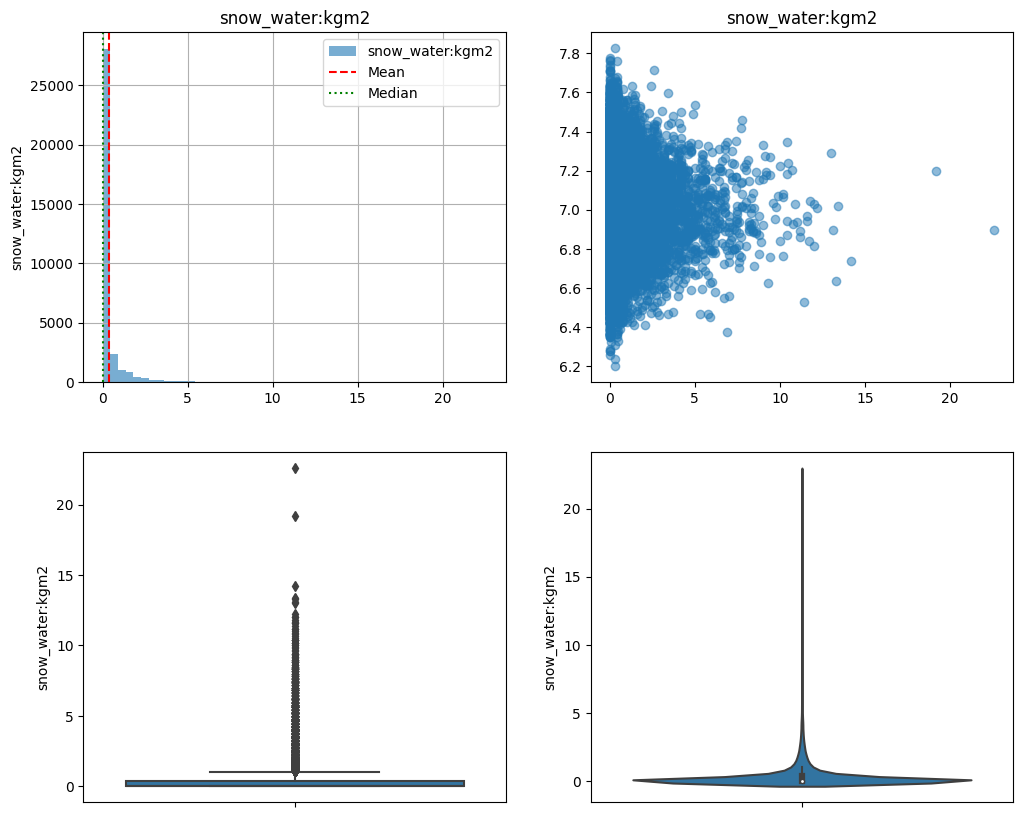

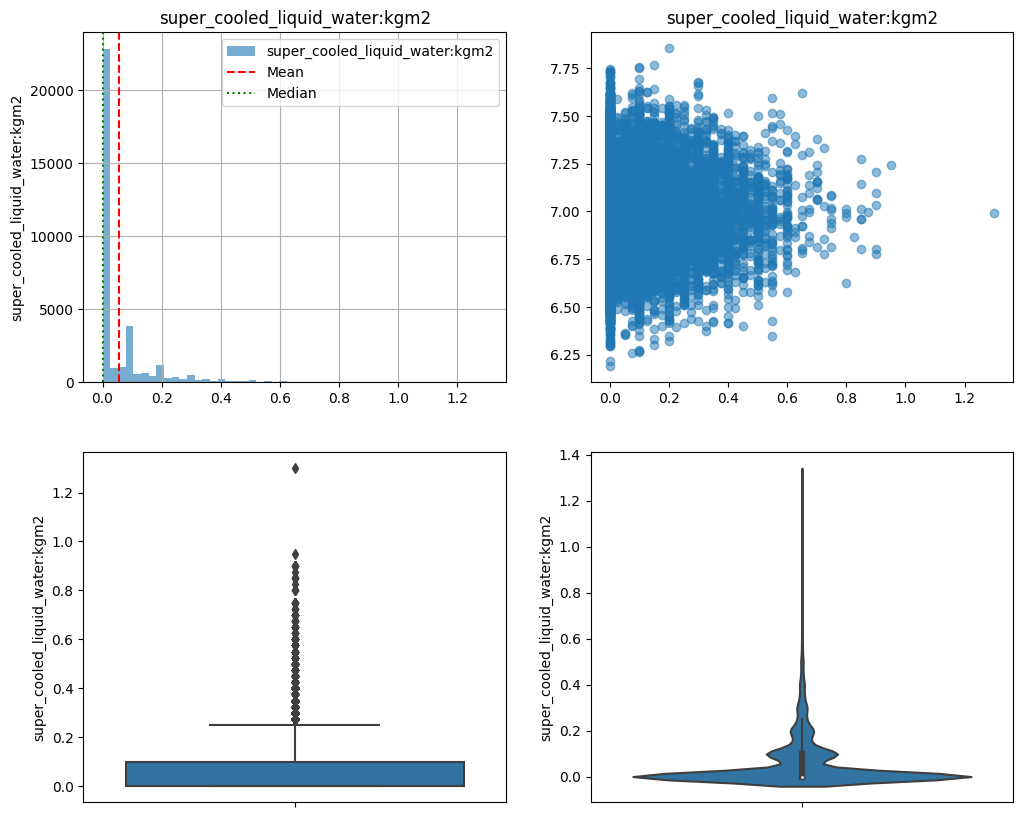

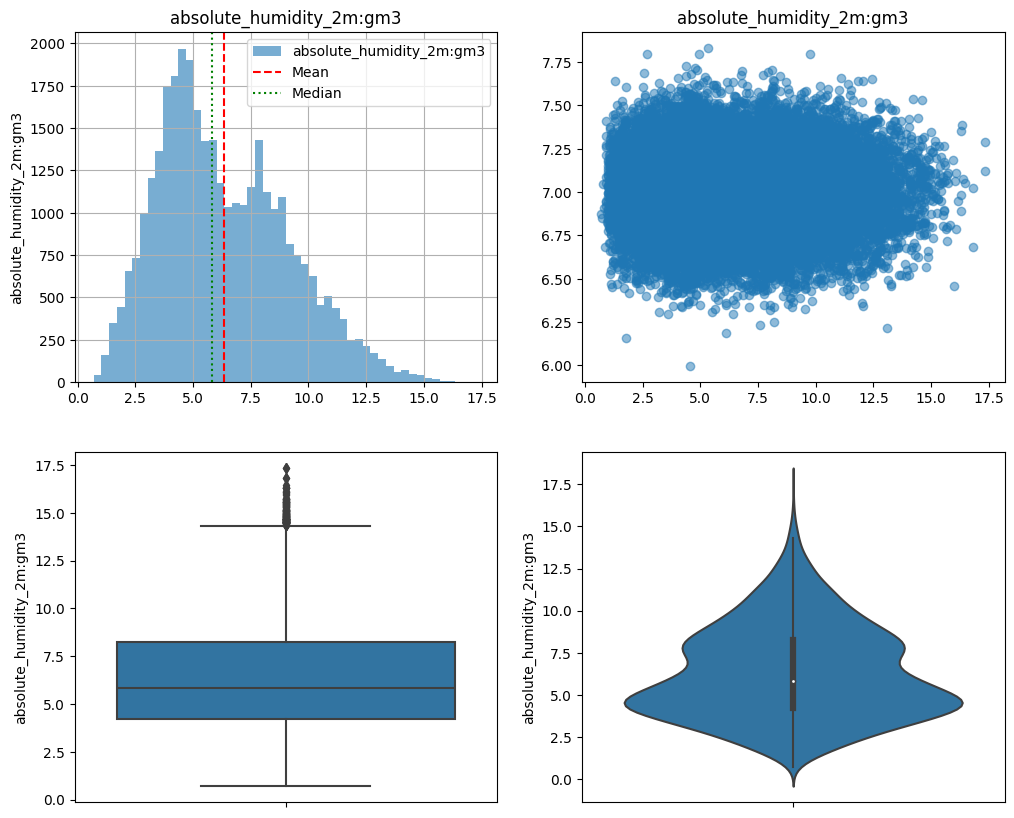

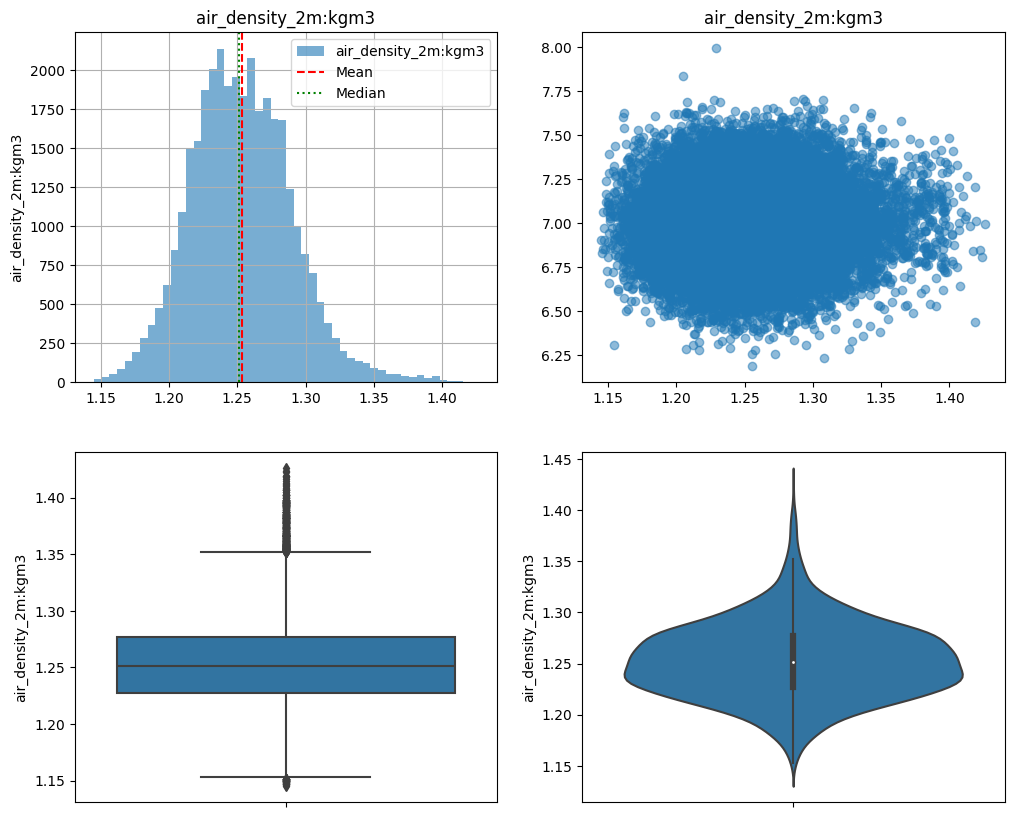

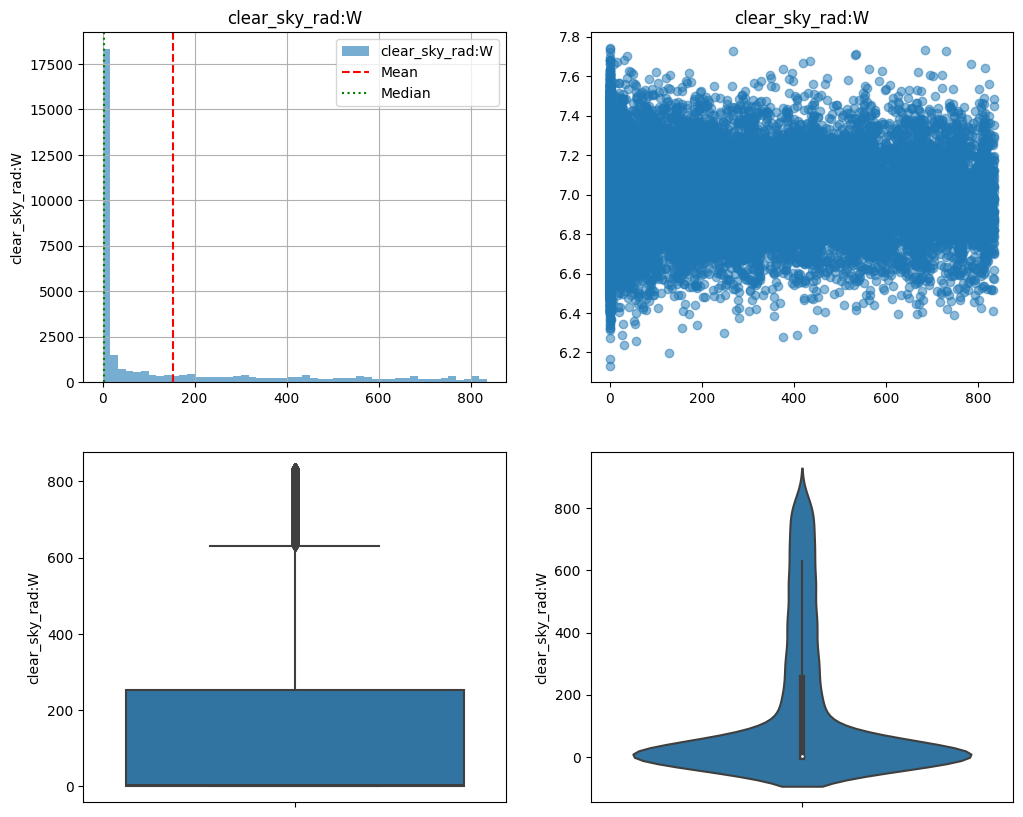

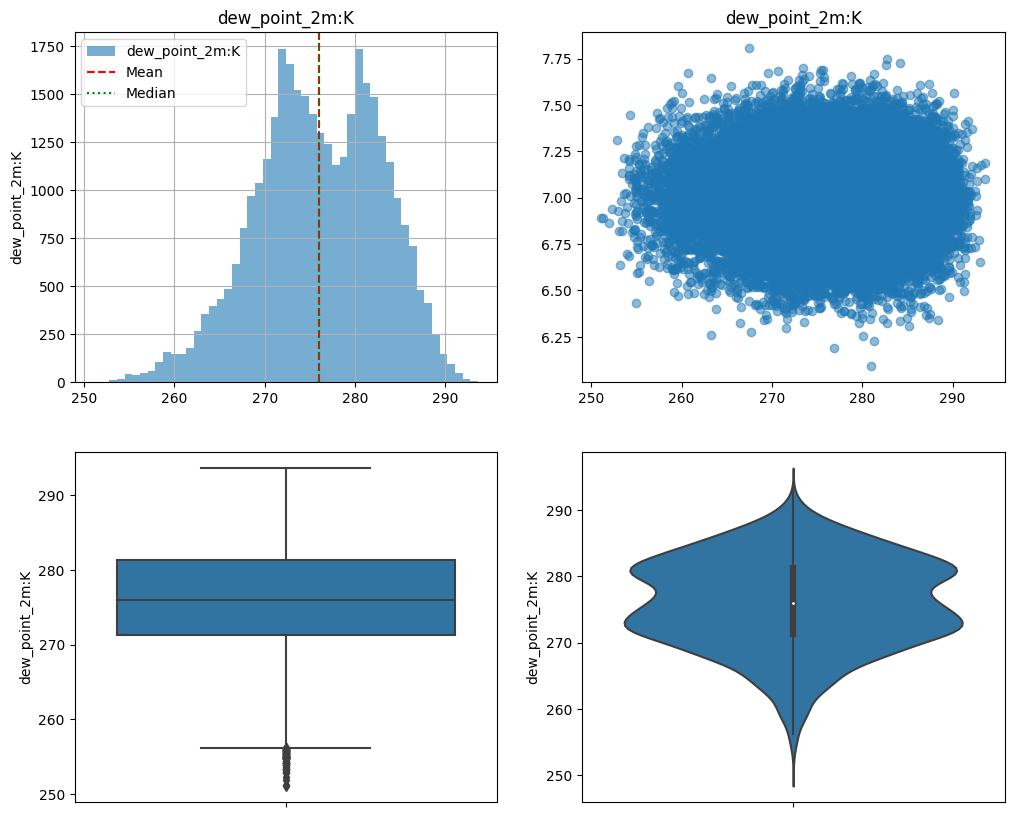

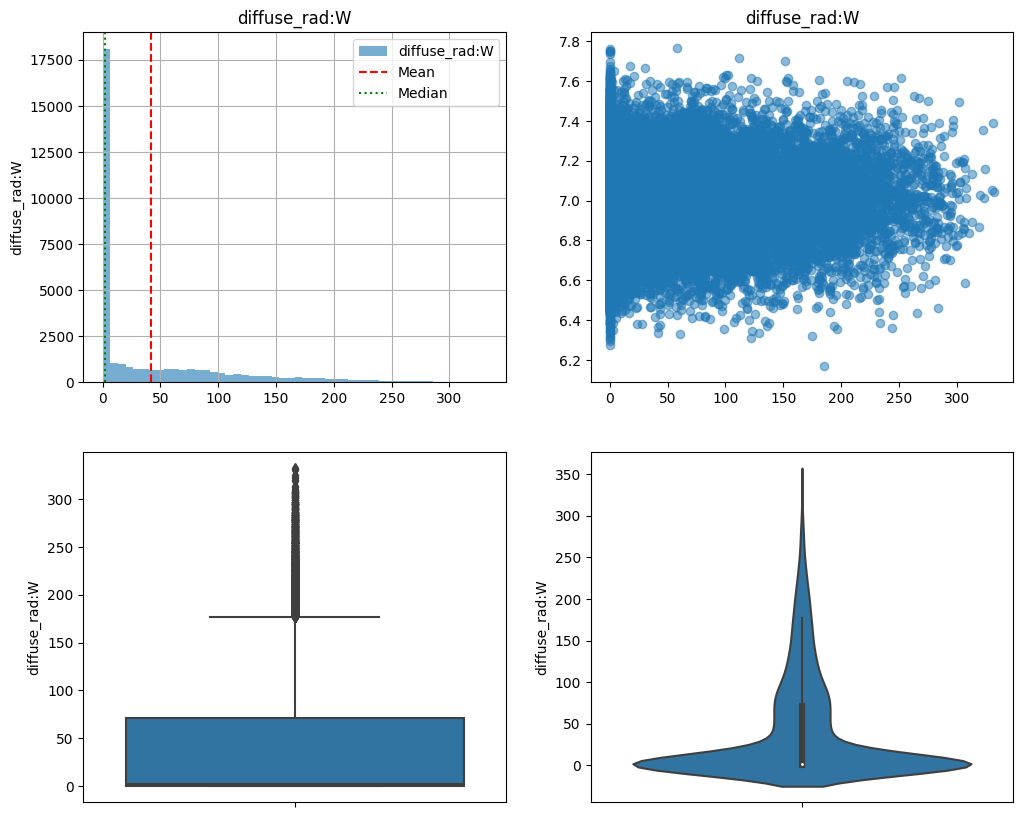

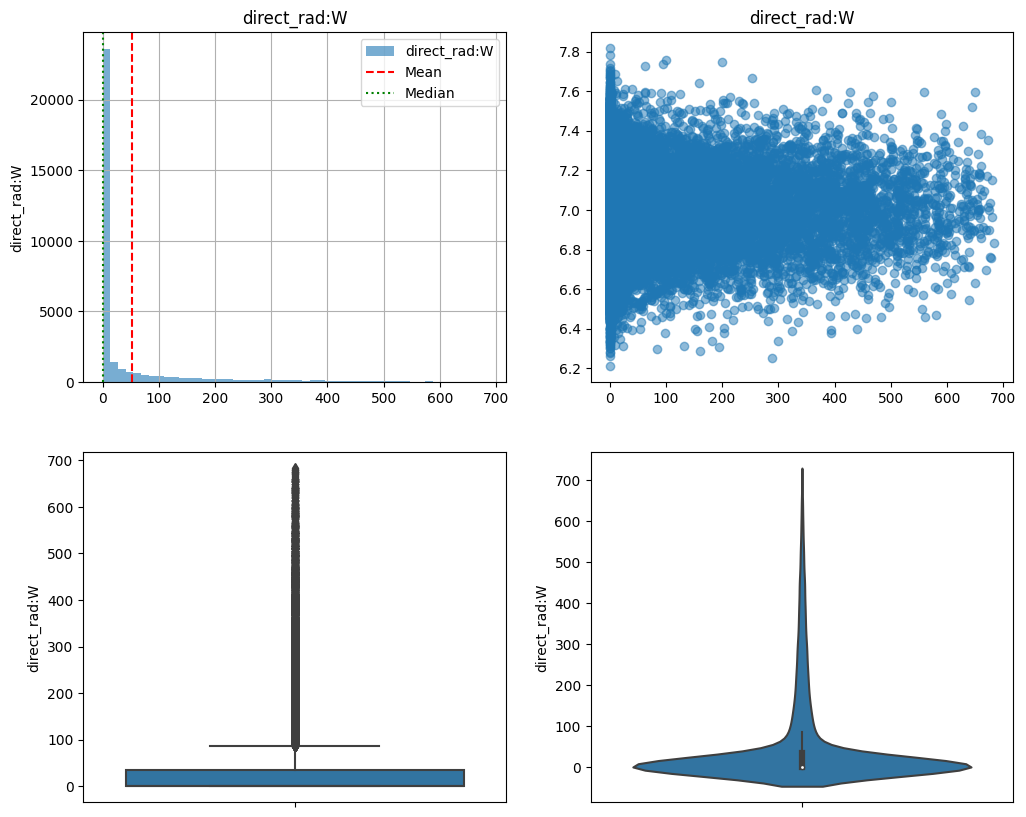

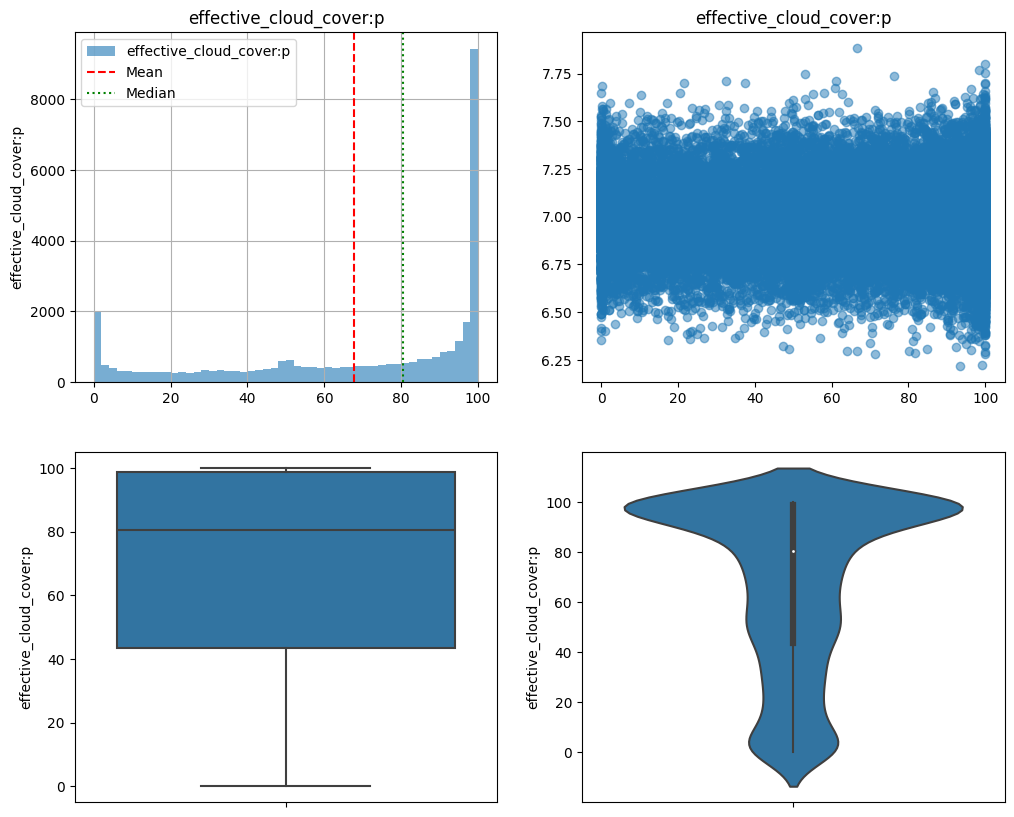

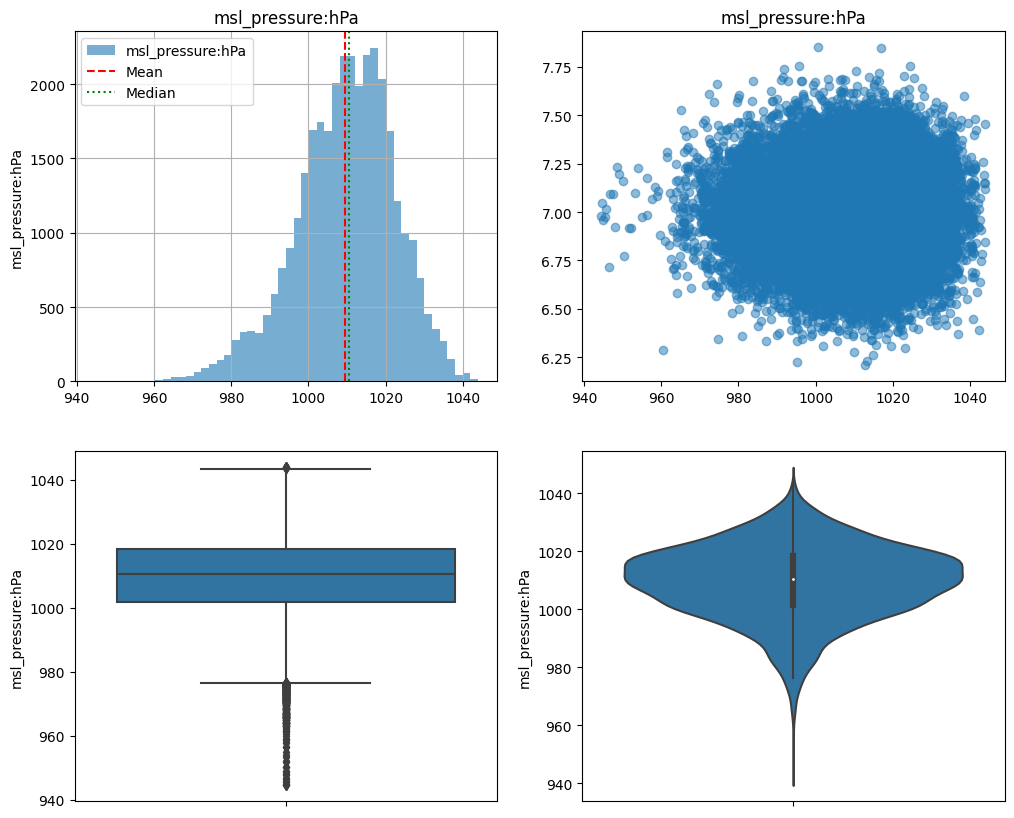

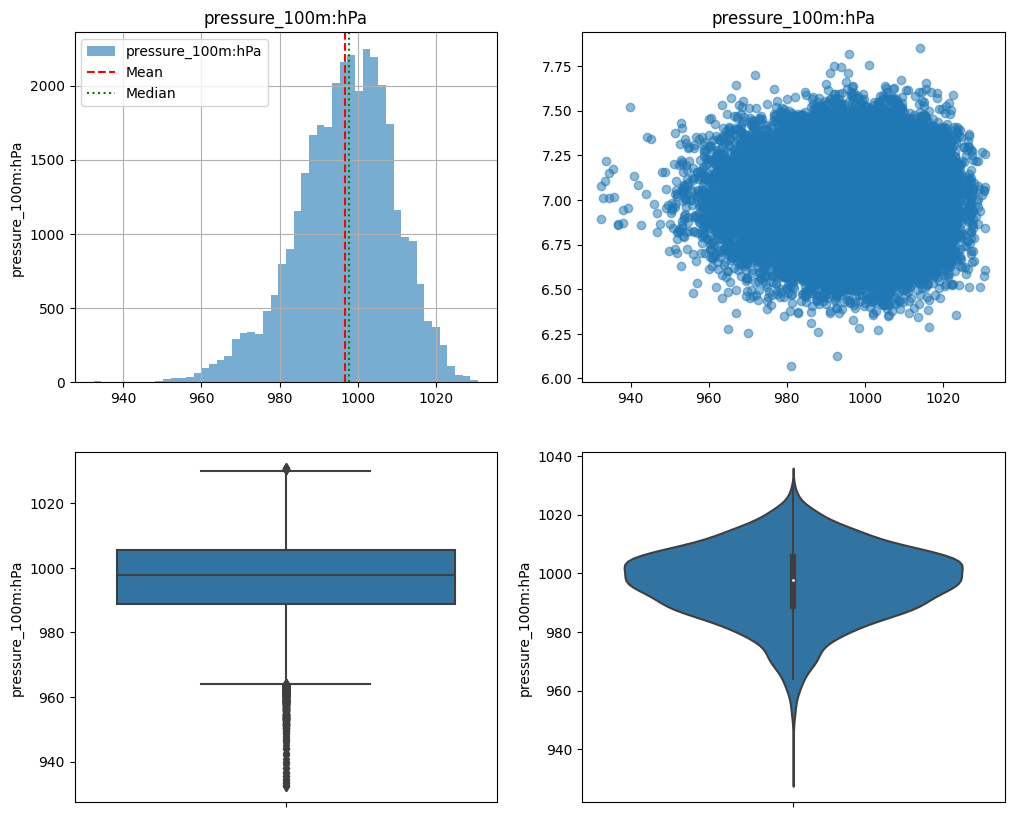

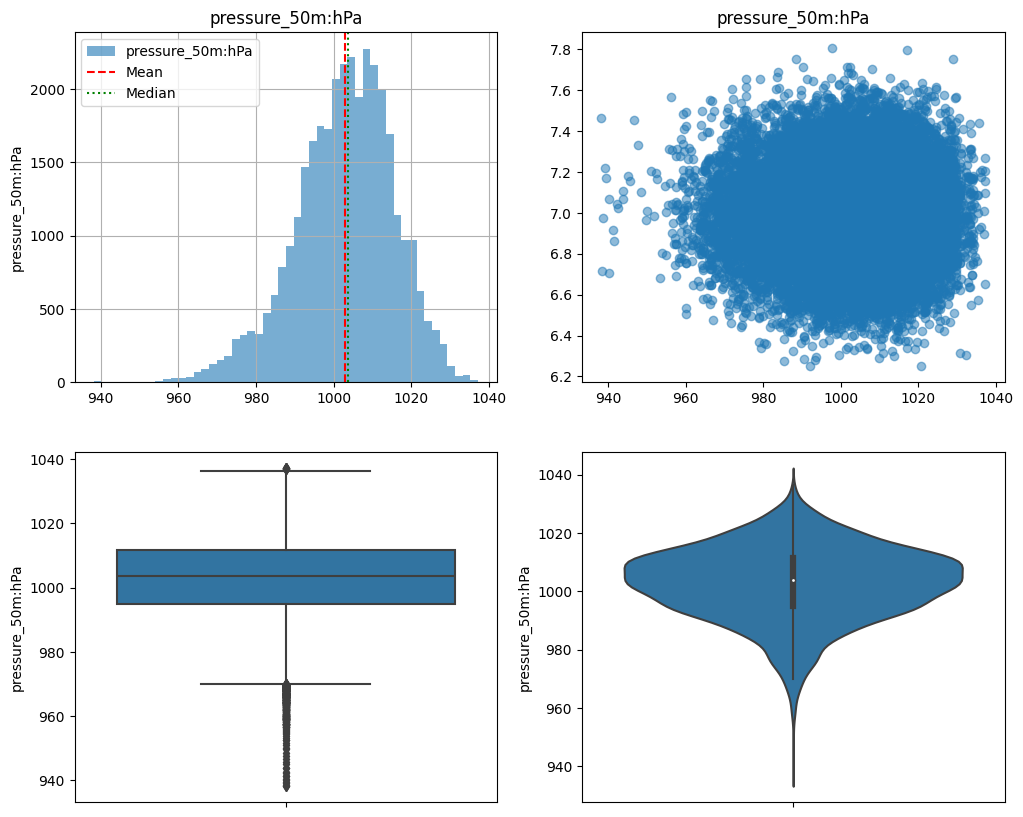

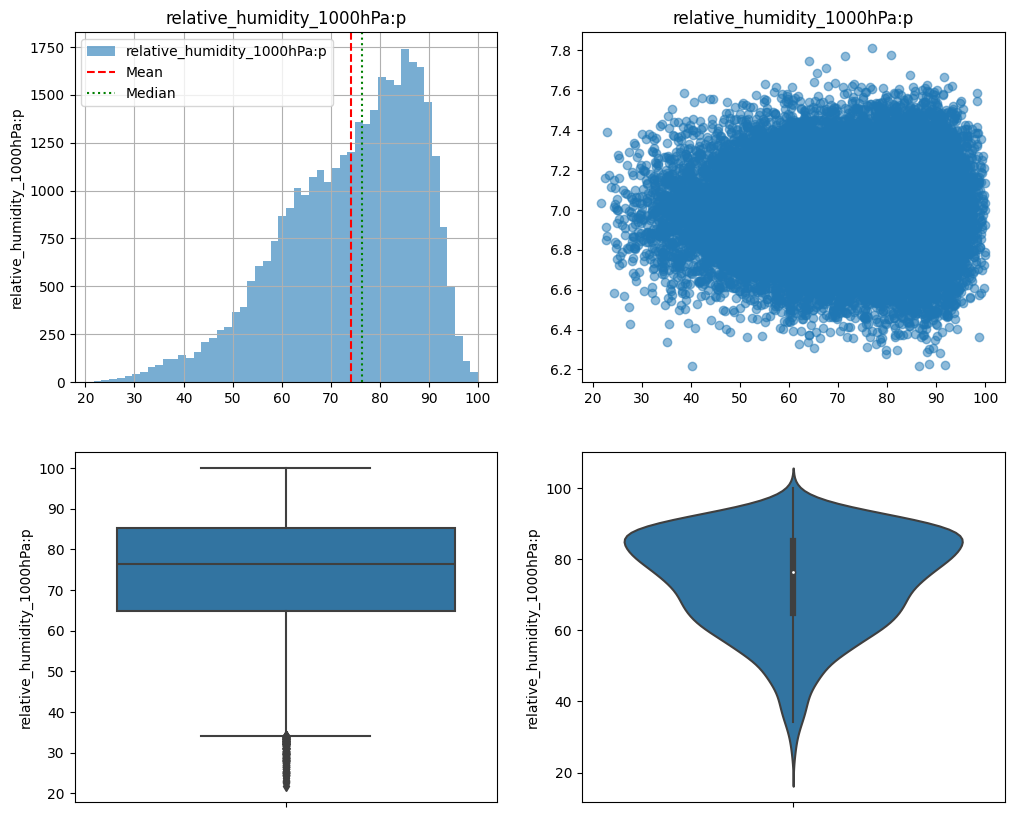

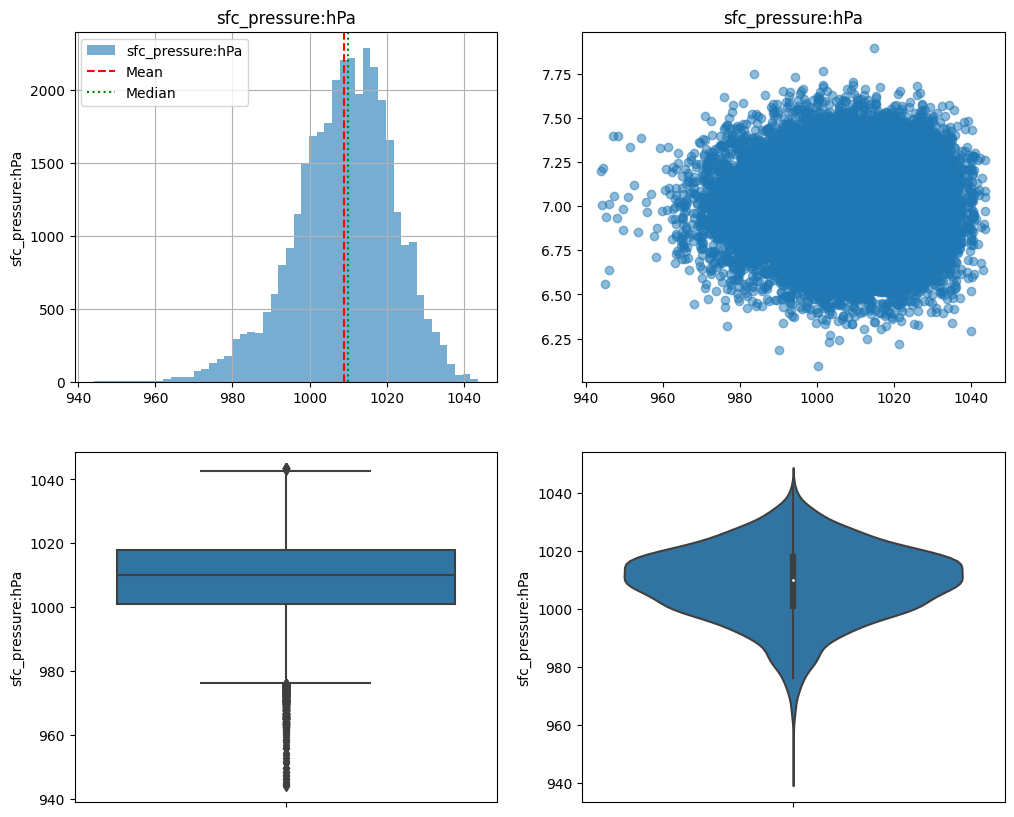

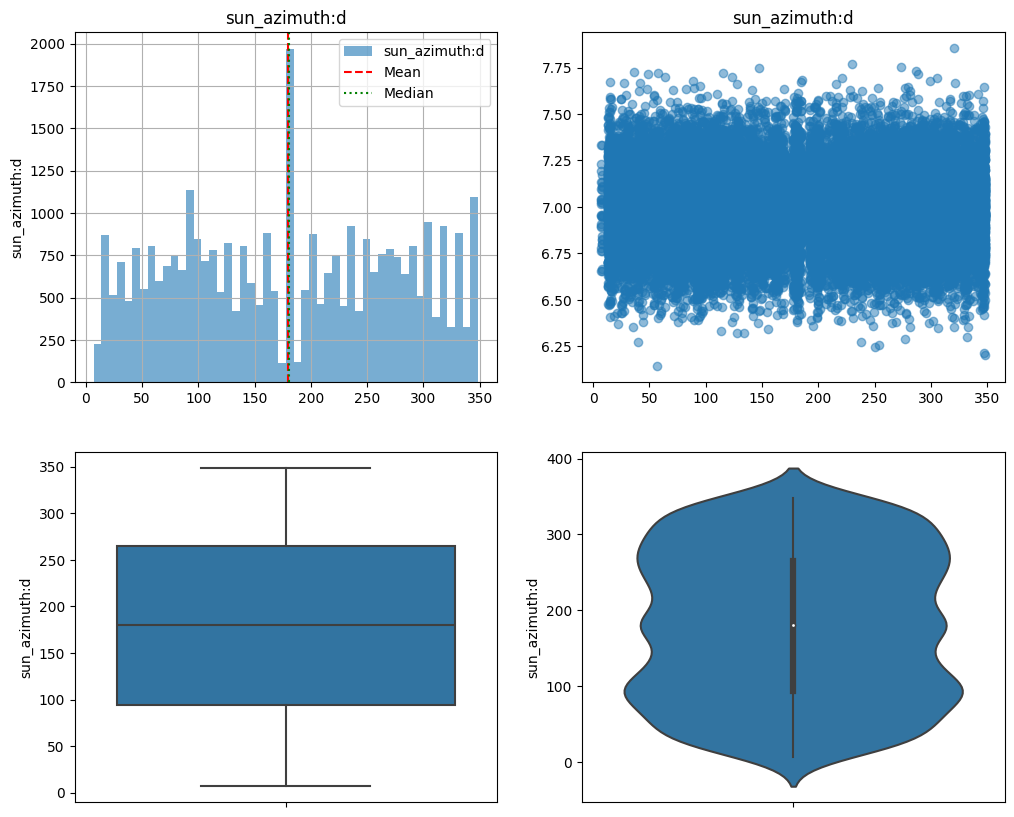

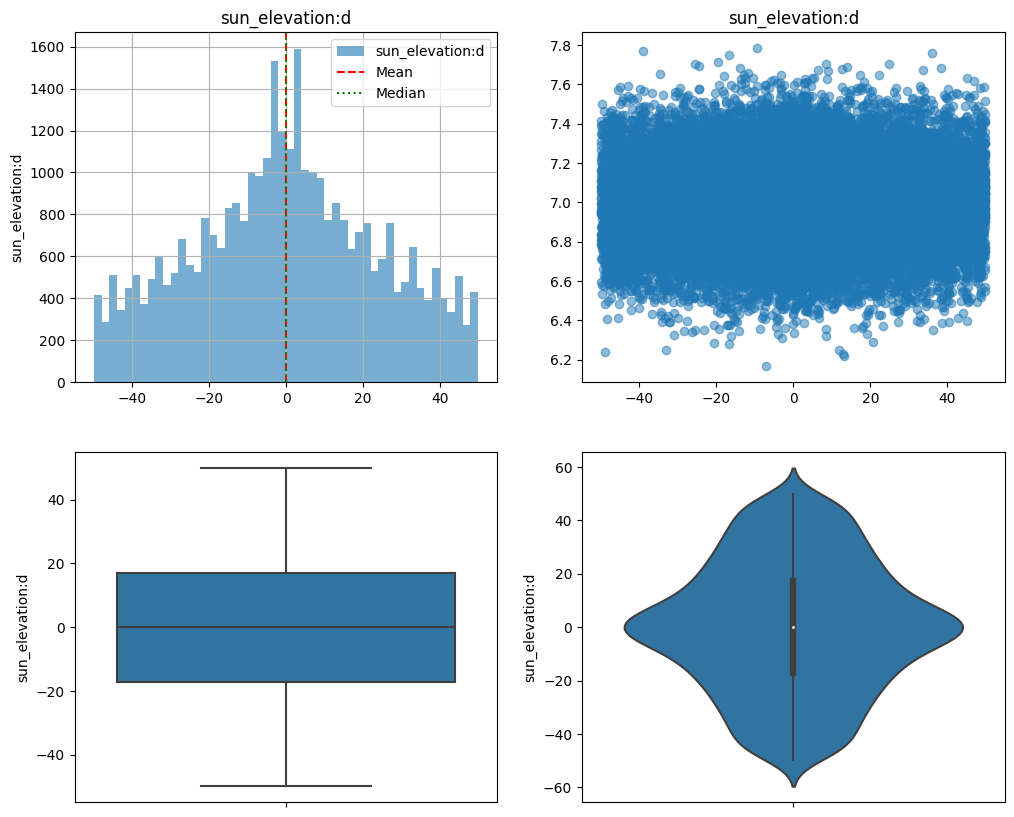

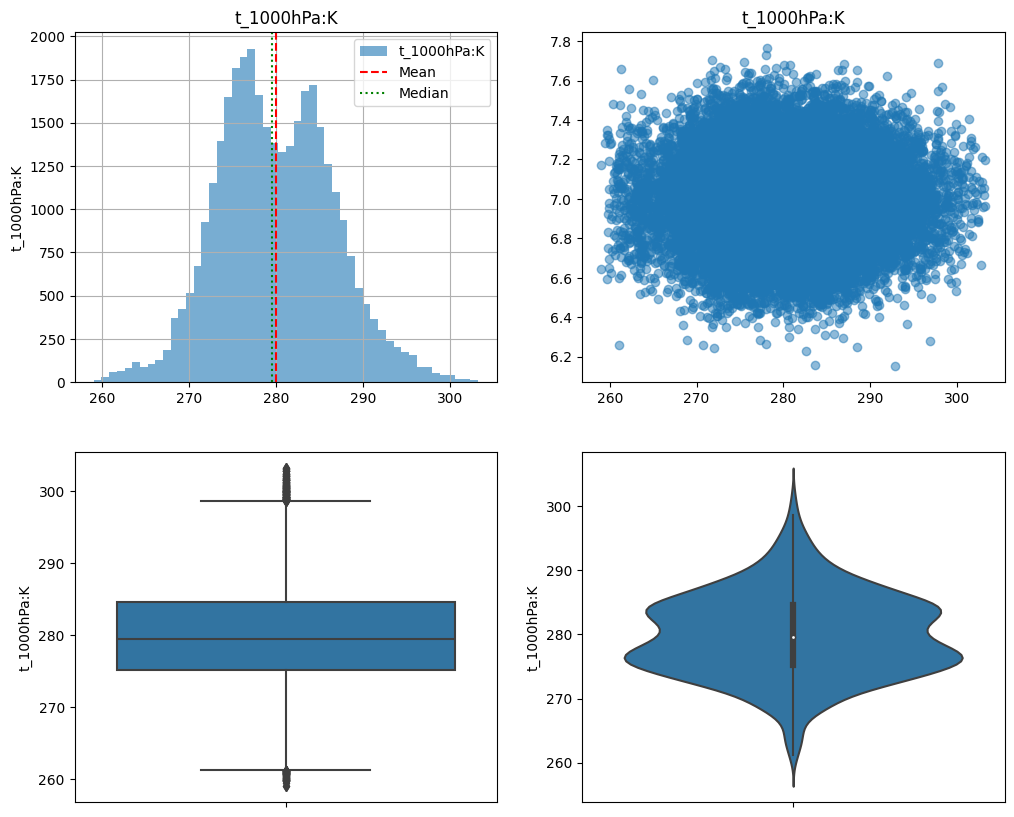

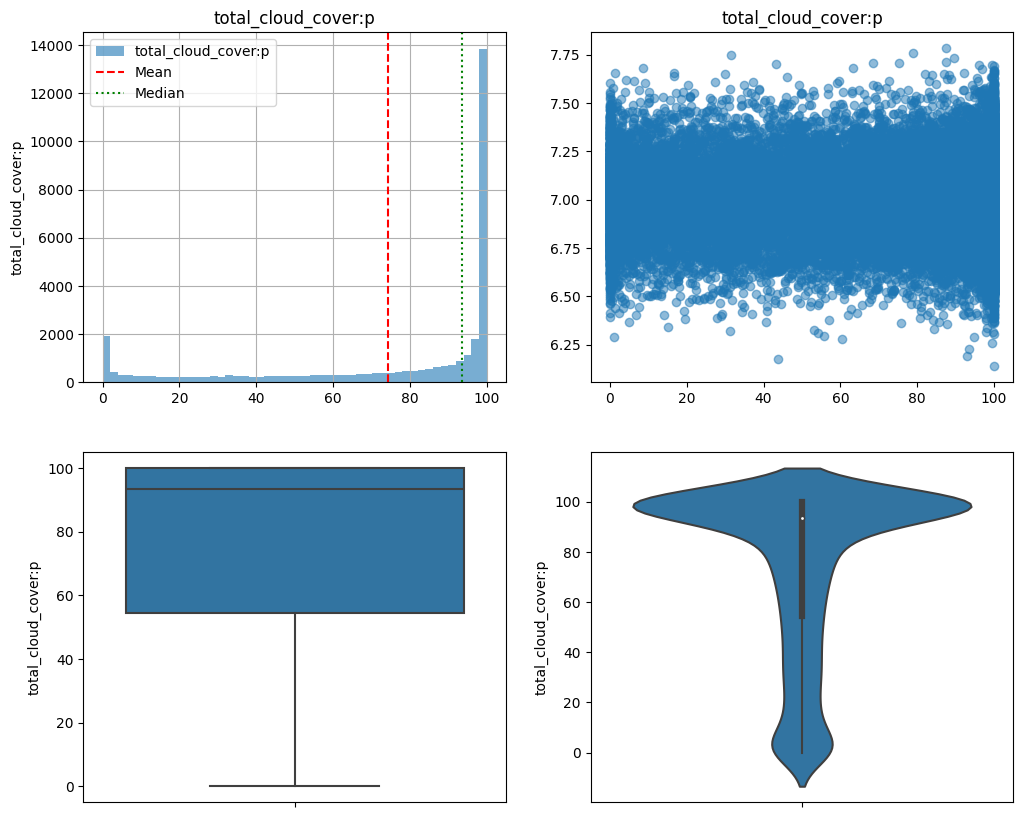

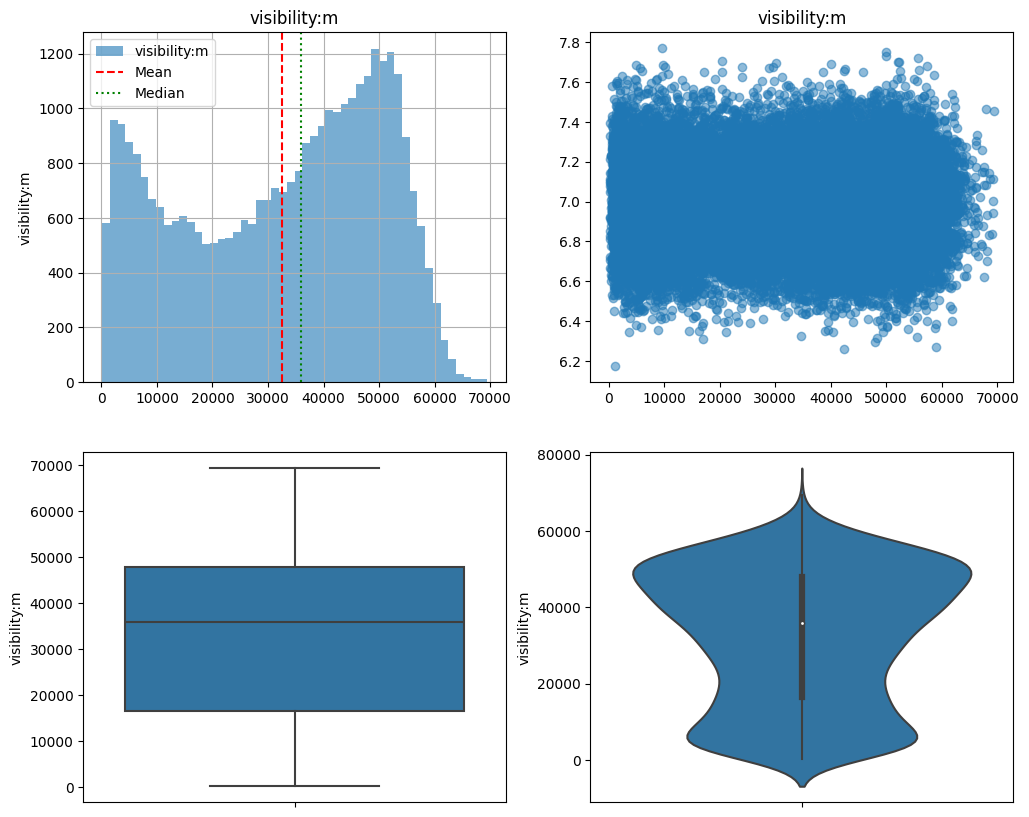

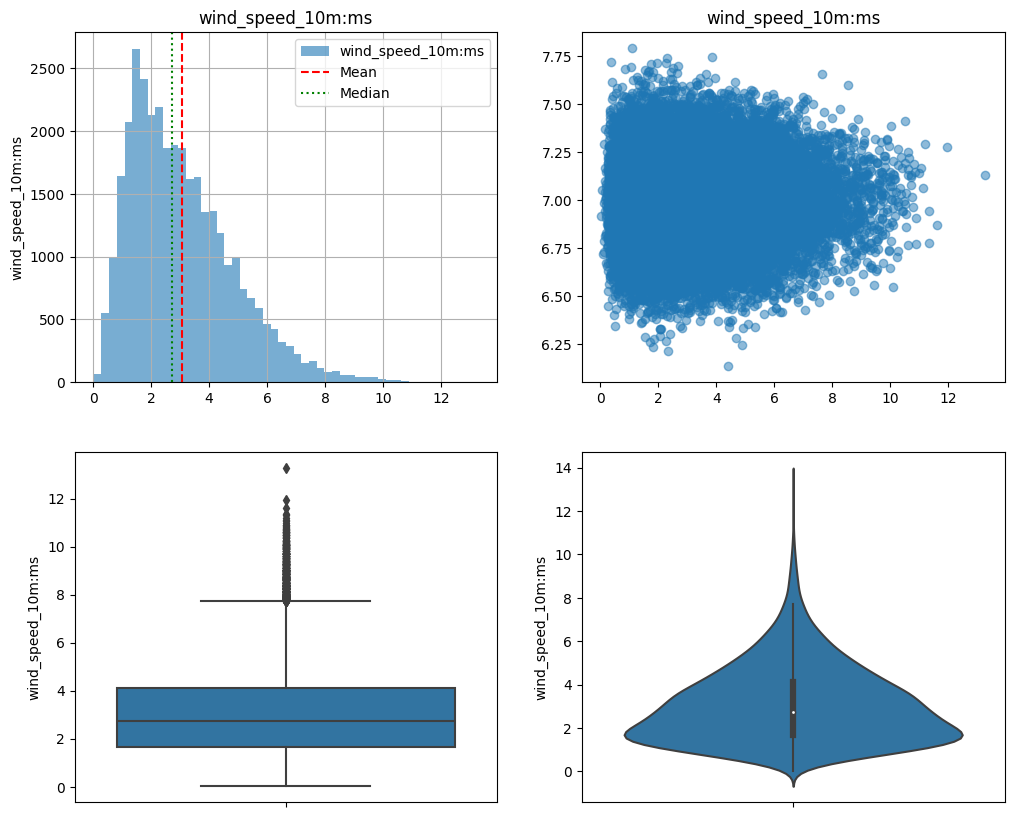

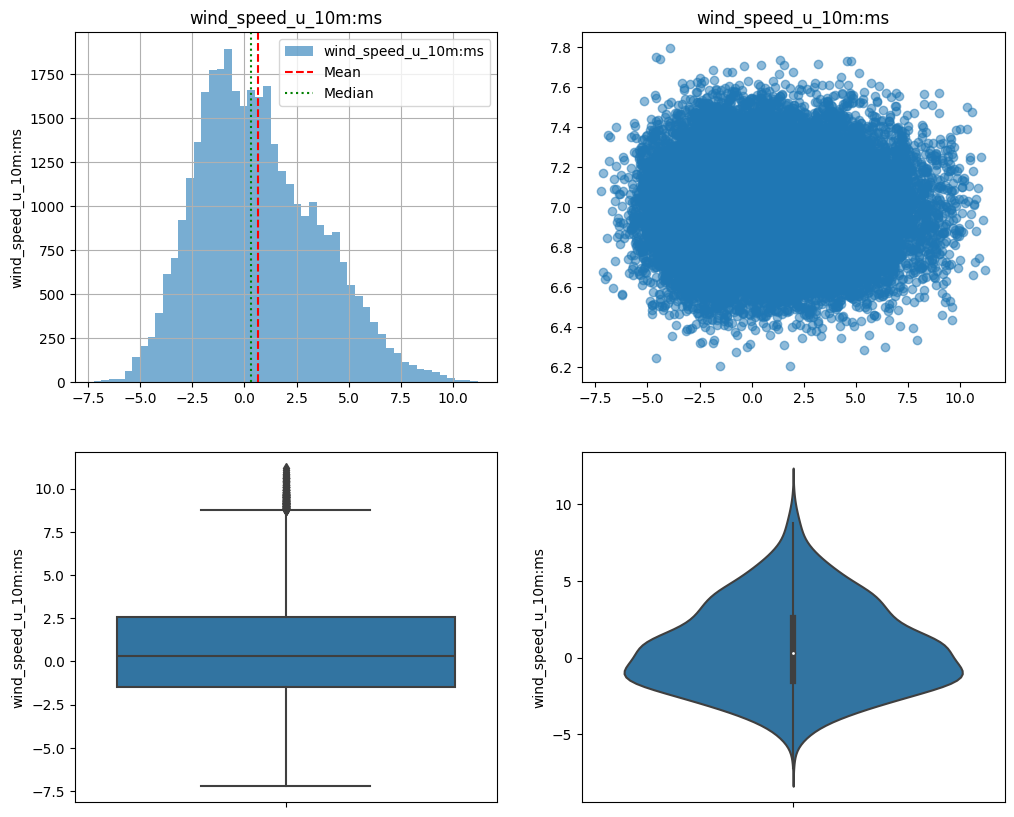

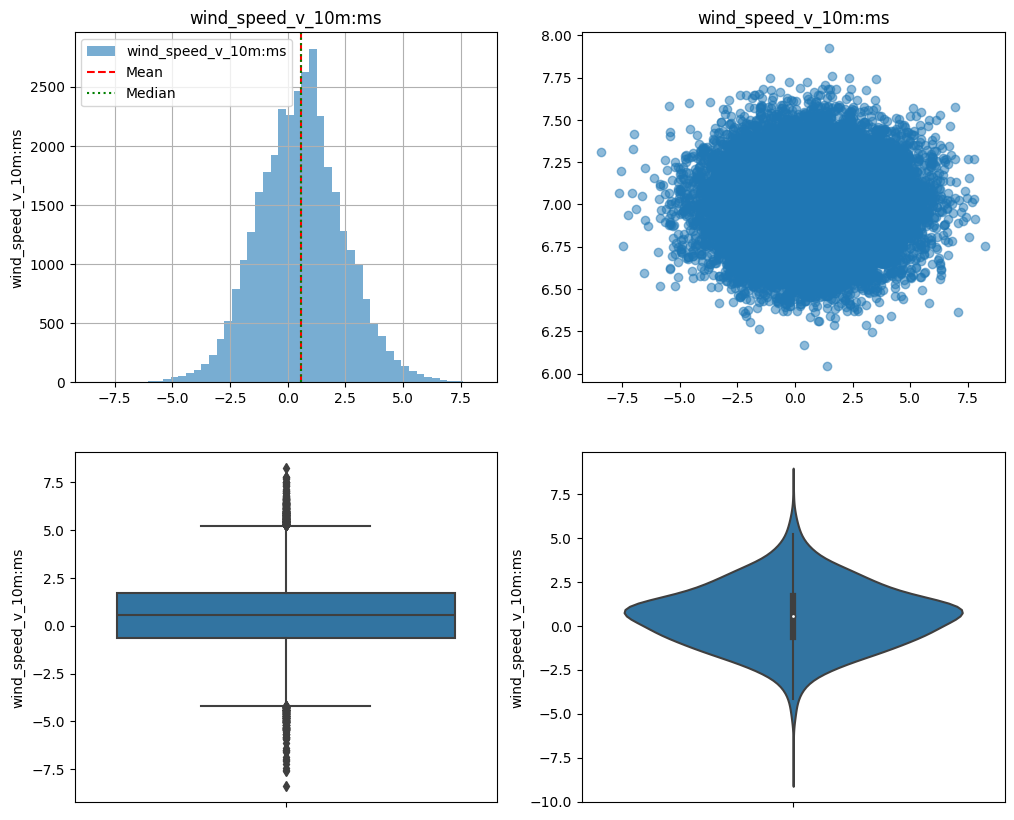

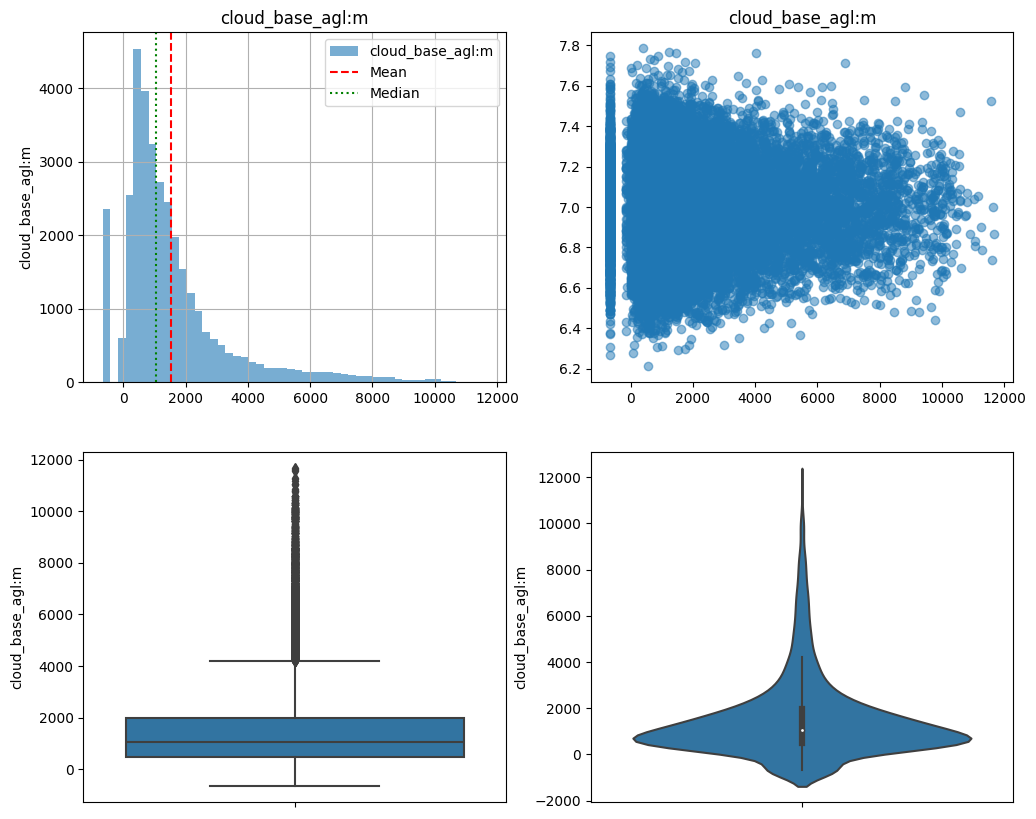

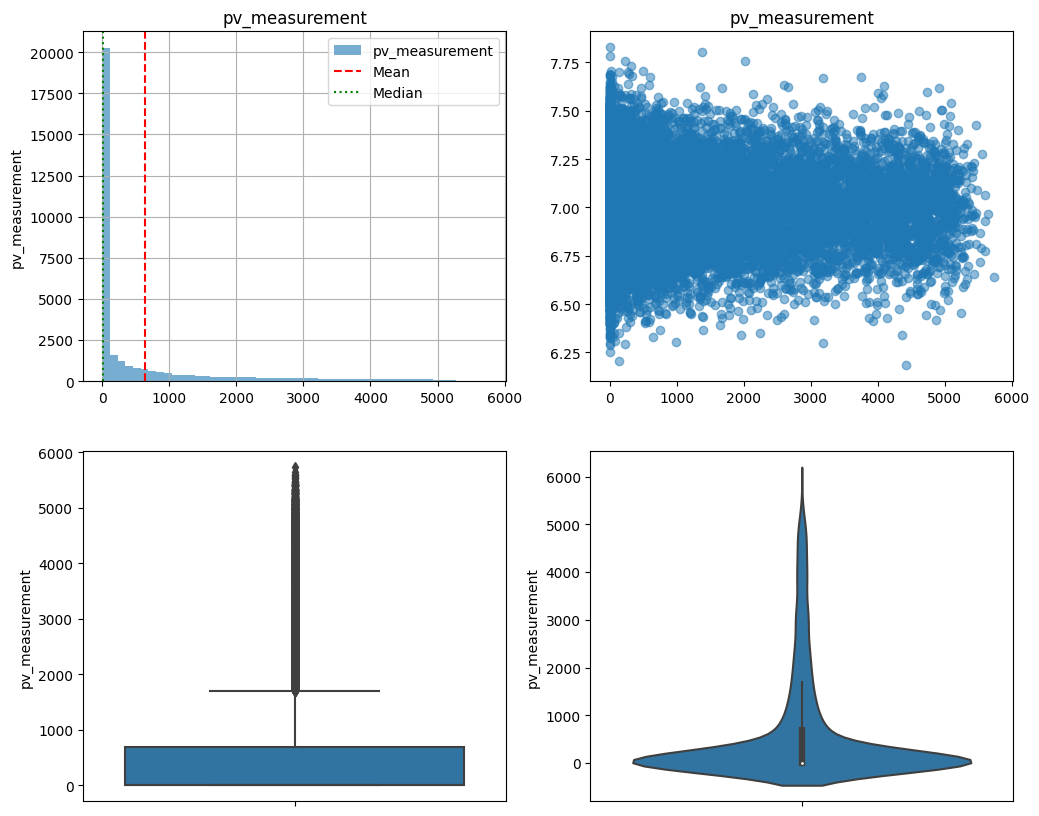

In [86]:
for feat in dm.data_A.columns: 

    if feat != "date_forecast" and "idx" not in feat:
        plt.figure(figsize=(12, 10))

        plt.subplot(2, 2, 1)
        dm.data_A[feat].hist(bins=50, label=feat, alpha=0.6)
        plt.axvline(np.mean(dm.data_A[feat]), ls='--', c='r', label="Mean")
        plt.axvline(np.median(dm.data_A[feat]), ls=':', c='g', label="Median")
        plt.ylabel(feat)
        plt.title(feat)
        plt.legend()

        plt.subplot(2, 2, 2)
        plt.scatter(dm.data_A[feat], np.random.normal(7, 0.2, size=dm.data_A.shape[0]), alpha=0.5)
        plt.title(feat)

        plt.subplot(2, 2, 3)
        sns.boxplot(y=feat, data=dm.data_A)

        plt.subplot(2, 2, 4)
        sns.violinplot(y=feat, data=dm.data_A, bw=0.2)


We look at the Z-score to determine if any points fall outside the acceptable range of measurements. 

In [87]:
def remove_outliers_z_score(data:pd.DataFrame, feature:str, threshold=1): 
    from scipy import stats

    z_scores = stats.zscore(data[feature].astype(float))

    outliers = data[feature][z_scores > threshold]

    print(f"Found {len(outliers)} outliers in feature {feature}.")


for feat in dm.data_A: 
    if feat != "date_forecast": 
        remove_outliers_z_score(dm.data_B, feat, threshold=3)

    

Found 0 outliers in feature is_day:idx.
Found 0 outliers in feature is_in_shadow:idx.
Found 53 outliers in feature clear_sky_energy_1h:J.
Found 497 outliers in feature diffuse_rad_1h:J.
Found 909 outliers in feature direct_rad_1h:J.
Found 447 outliers in feature fresh_snow_12h:cm.
Found 492 outliers in feature fresh_snow_24h:cm.
Found 512 outliers in feature precip_5min:mm.
Found 450 outliers in feature rain_water:kgm2.
Found 597 outliers in feature snow_water:kgm2.
Found 631 outliers in feature super_cooled_liquid_water:kgm2.
Found 167 outliers in feature absolute_humidity_2m:gm3.
Found 207 outliers in feature air_density_2m:kgm3.
Found 56 outliers in feature clear_sky_rad:W.
Found 0 outliers in feature dew_point_2m:K.
Found 510 outliers in feature diffuse_rad:W.
Found 923 outliers in feature direct_rad:W.
Found 0 outliers in feature effective_cloud_cover:p.
Found 0 outliers in feature msl_pressure:hPa.
Found 0 outliers in feature pressure_100m:hPa.
Found 0 outliers in feature pressur

As we can see there is alot of outliers. Mostly in the snow features. This makes sense due to the low amount of snow, so any snow day will be an outlier to the mean. The high 

# Feature engineering

## Adding time features

As our data is fundamentally based on time, we implement features to reflect this. Thus we have the hour of the day and day of the year as our time features. To justify this, we looked at the frequency in which pv_measurements varied the mod
st

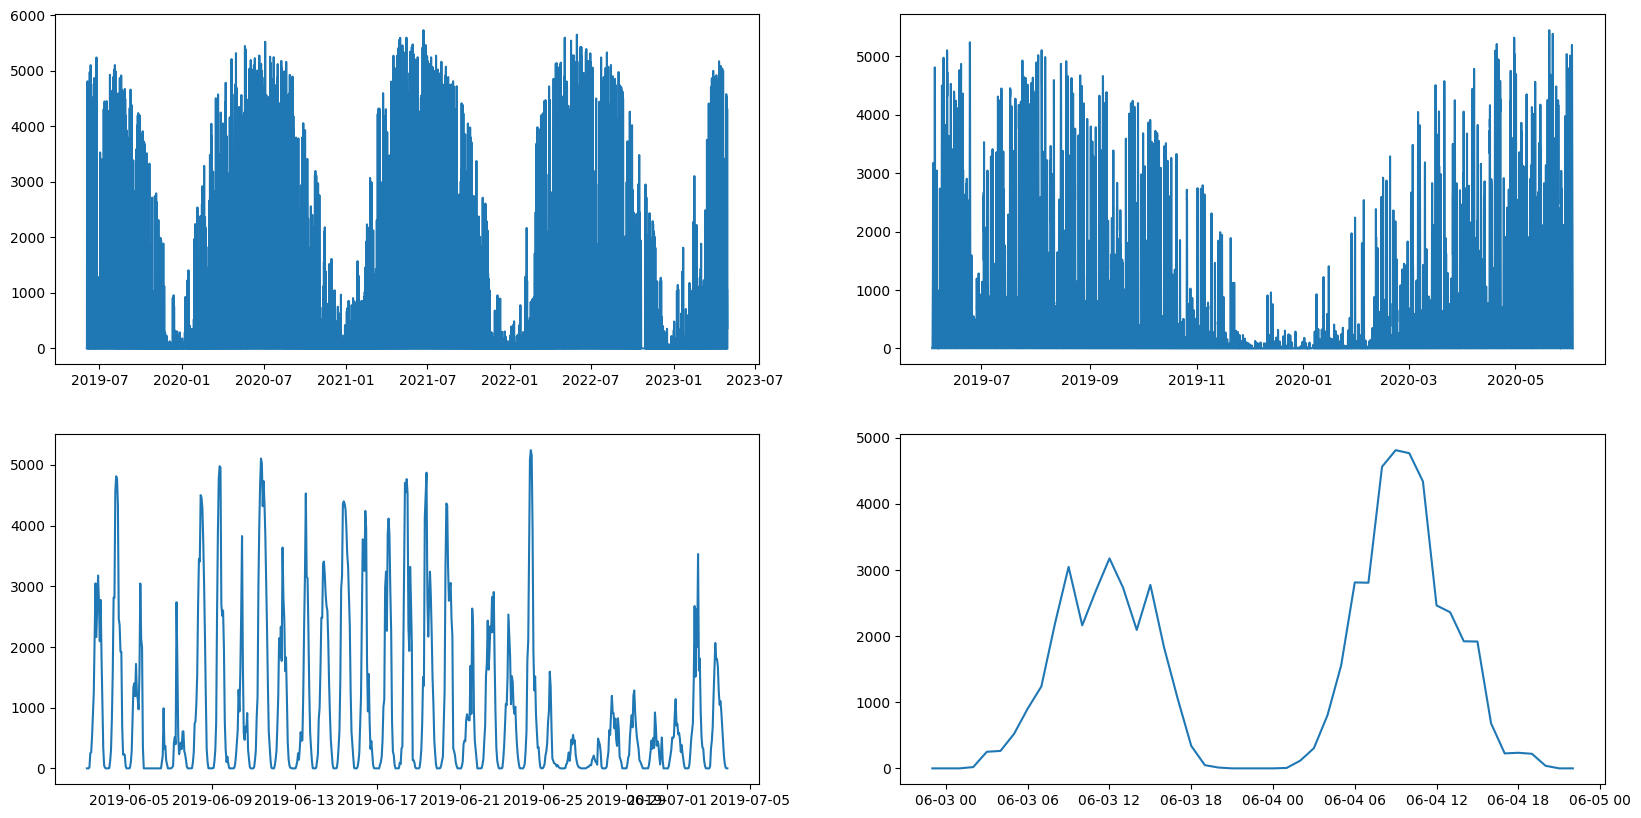

In [88]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

ax[0][0].plot(dm.data_A["date_forecast"], dm.data_A["pv_measurement"])    # Whole data/ year frequency
ax[0][1].plot(dm.data_A["date_forecast"][0:24*365], dm.data_A["pv_measurement"][0:24*365])    # Whole data/ monthly frequency
ax[1][0].plot(dm.data_A["date_forecast"][0:24*31], dm.data_A["pv_measurement"][0:24*31])    # Whole data/ day frequency
ax[1][1].plot(dm.data_A["date_forecast"][0:48], dm.data_A["pv_measurement"][0:48])    # Whole data/ day frequency



<b>SE OVER AT TING GIR MENING</b>

Firstly, we see that there is no yearly trend. Meaning, we dont have a growing trend across the 4 years of data. (upper left)

Second, we have a monthly trend. At the middle of the year, pv_measurement tends to be higher. This alligns with our notion that bad weather correlated to low pv generation. (upprer right)

Third, zooming in on a monthly period, we see that there is no trend across one month. There isnt higher values at the middle, beginning or end of each month (in general) (lower left)

Fourth, we zoom in on two days, and we can see that during night pv is low and during the day pv is high, indicating a trend throughout the day. (lower right)

From this we see that a hourly function would capture the dayly trend, whilst a "day of year" function would capture the monthly pattern. 

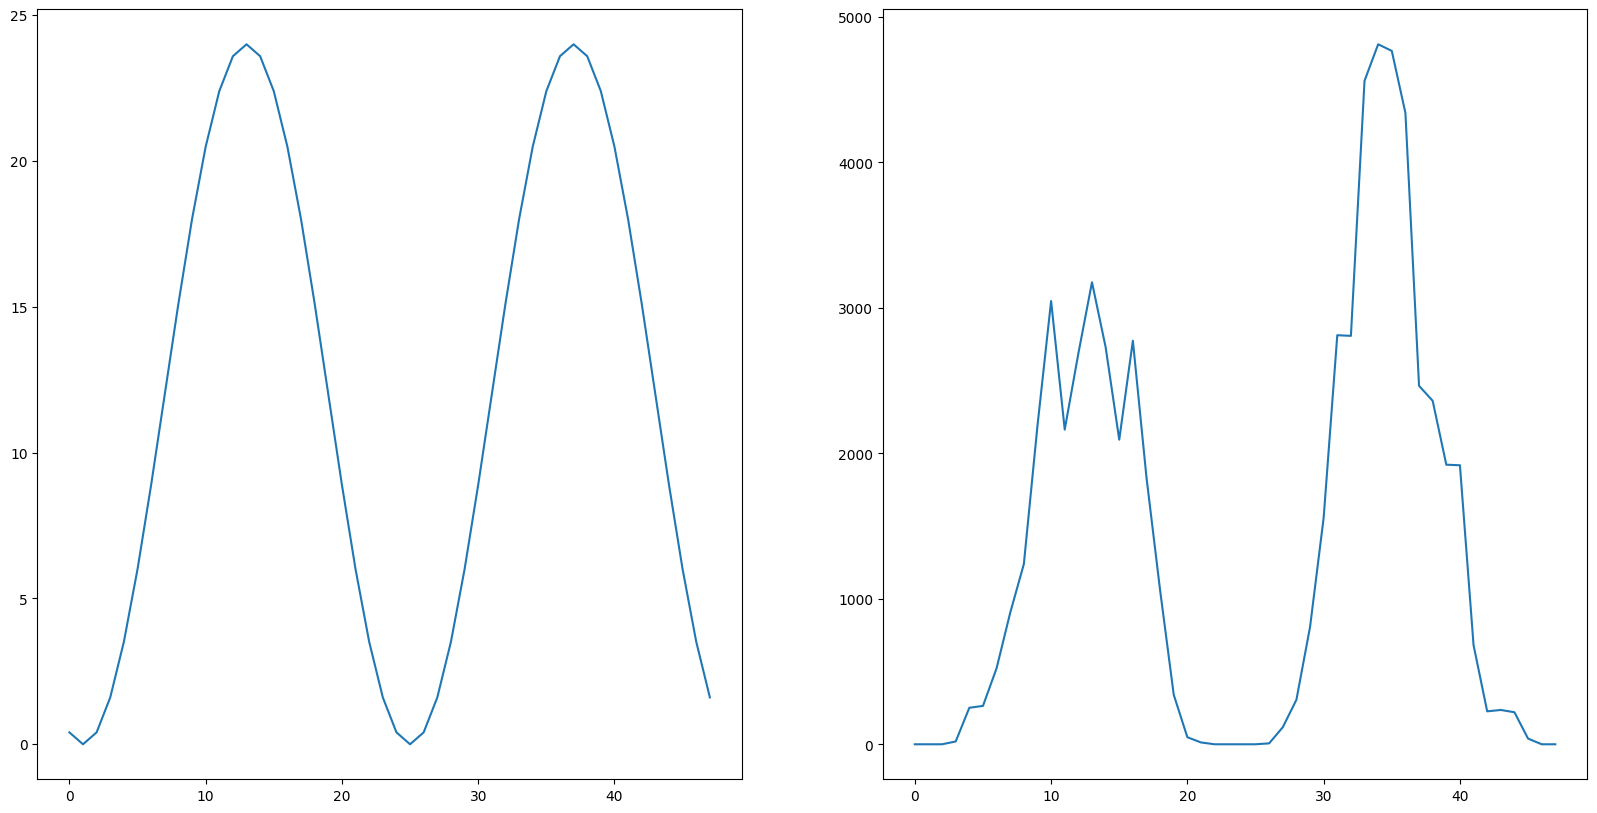

In [89]:
import numpy as np 

def hour_func(x): 
    return -12*np.cos(2*np.pi/24 * x) + 12

dm.X_test_estimated_a["hours"] = hour_func(dm.X_test_estimated_a["date_forecast"].dt.hour)
dm.X_test_estimated_b["hours"] = hour_func(dm.X_test_estimated_b["date_forecast"].dt.hour)
dm.X_test_estimated_c["hours"] = hour_func(dm.X_test_estimated_c["date_forecast"].dt.hour)

dm.data_A["hours"] =  hour_func(dm.data_A["date_forecast"].dt.hour)
dm.data_B["hours"] = hour_func(dm.data_B["date_forecast"].dt.hour)
dm.data_C["hours"] = hour_func(dm.data_C["date_forecast"].dt.hour)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax[0].plot(dm.data_A["hours"][0:48])
ax[1].plot(dm.data_A["pv_measurement"][0:48])



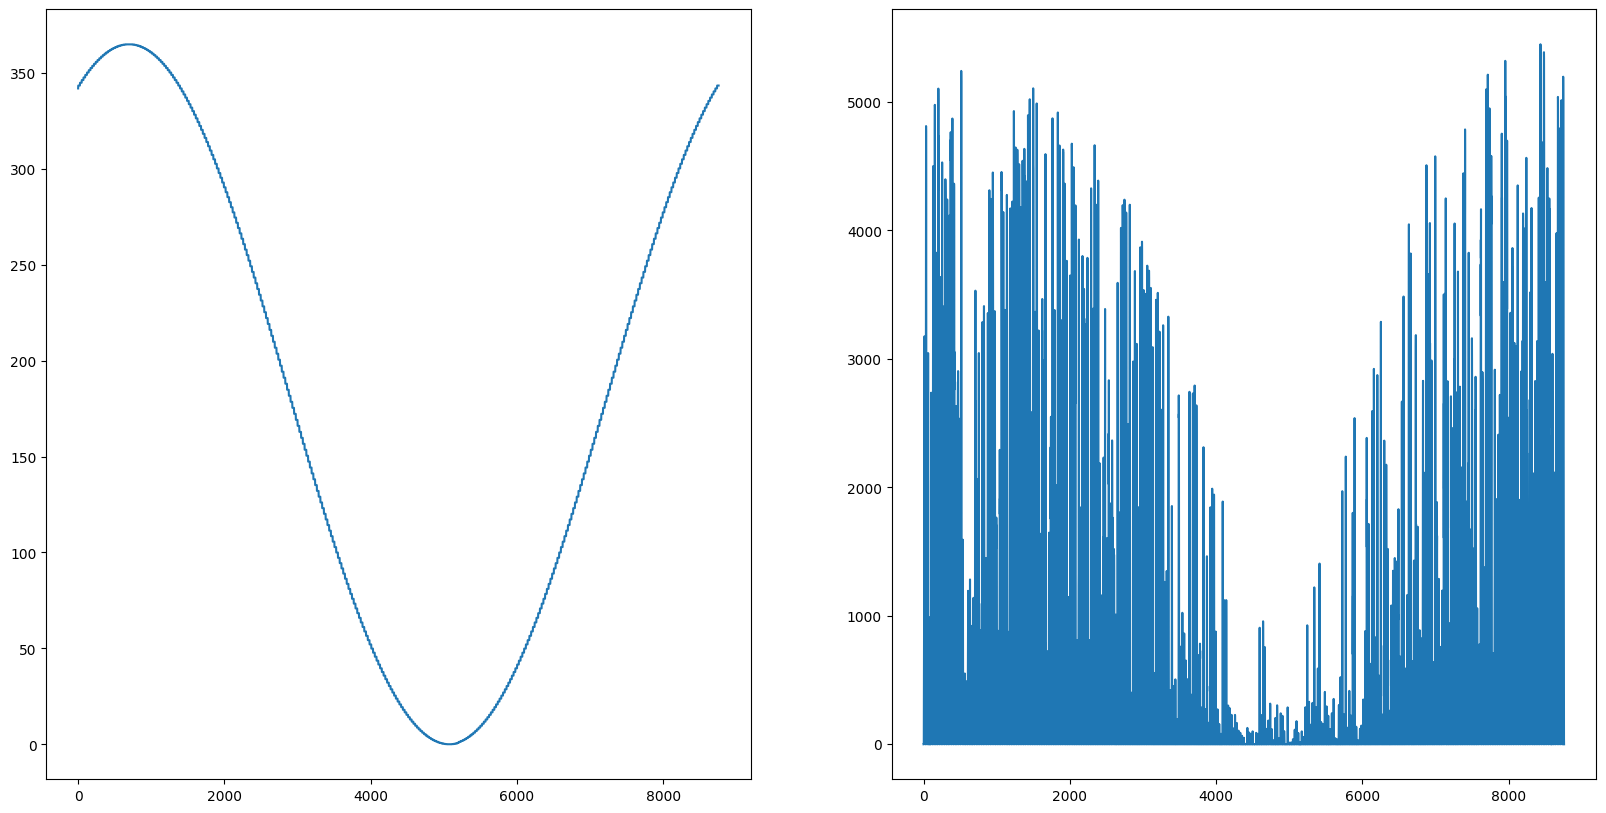

In [90]:
import numpy as np 

def day_func(x): 
    return -182.5*np.cos(2*np.pi/365 * x) + 182.5

dm.X_test_estimated_a["day_year"] = day_func(dm.X_test_estimated_a["date_forecast"].dt.dayofyear)
dm.X_test_estimated_b["day_year"] = day_func(dm.X_test_estimated_b["date_forecast"].dt.dayofyear)
dm.X_test_estimated_c["day_year"] = day_func(dm.X_test_estimated_c["date_forecast"].dt.dayofyear)

dm.data_A["day_year"] =  day_func(dm.data_A["date_forecast"].dt.dayofyear)
dm.data_B["day_year"] = day_func(dm.data_B["date_forecast"].dt.dayofyear)
dm.data_C["day_year"] = day_func(dm.data_C["date_forecast"].dt.dayofyear)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax[0].plot(dm.data_A["day_year"][0:24*365])
ax[1].plot(dm.data_A["pv_measurement"][0:24*365])



## Adding Lag and Lead features


<b>IDK OM ME BØR NEVNE TESTING HER, HVIS ME BØR VISE TIL TESTINGEN. ISÅFALL ENTEN FINN EN ANNEN GRUNN TIL ME LAGGE/ LEADE SPESIFIKT SÅN / SLETT DEN DELEN ANG TESTING / FLYTT TESTINGEN INN HER</b>


Lag and lead features are very popular when it comes to data across time. Its implemented her using the pandas .shift function on features we see make sense lagging. 

As we suspect the radiation parameters to have a big impact on the power generation, as well as the cloud features, we lag/ lead these. 

When deciding how much to lag/ lead we though it would be best to chose a relatively low number in both directions. This is to not make the lag be very high during the night because it only looks at the previous whole day whilst the middle of the day lag wold be low because it looks at the night. 

Therefore we lagged by 1 and 2 hours, and leaded with 1 and 2 hours. 

Some testing indicated this was best for the radiation parameters, whilst the clouds gave best results only lagging by 1 and 2 hours and leading by 2. 

In [91]:
def create_lag_feature(df:pd.DataFrame, feature:str, lag:int): 

    df = df.copy()

    df[f'{feature}_lagged_{lag}'] = df[feature].shift(lag)

    return df

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "direct_rad:W", -1)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "direct_rad:W", -1)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "direct_rad:W", -1)

dm.data_A = create_lag_feature(dm.data_A, "direct_rad:W", -1)
dm.data_B = create_lag_feature(dm.data_B, "direct_rad:W", -1)
dm.data_C = create_lag_feature(dm.data_C, "direct_rad:W", -1)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "diffuse_rad:W", -1)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "diffuse_rad:W", -1)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "diffuse_rad:W", -1)

dm.data_A = create_lag_feature(dm.data_A, "diffuse_rad:W", -1)
dm.data_B = create_lag_feature(dm.data_B, "diffuse_rad:W", -1)
dm.data_C = create_lag_feature(dm.data_C, "diffuse_rad:W", -1)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "clear_sky_rad:W", -1)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "clear_sky_rad:W", -1)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "clear_sky_rad:W", -1)

dm.data_A = create_lag_feature(dm.data_A, "clear_sky_rad:W", -1)
dm.data_B = create_lag_feature(dm.data_B, "clear_sky_rad:W", -1)
dm.data_C = create_lag_feature(dm.data_C, "clear_sky_rad:W", -1)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "direct_rad:W", -2)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "direct_rad:W", -2)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "direct_rad:W", -2)

dm.data_A = create_lag_feature(dm.data_A, "direct_rad:W", -2)
dm.data_B = create_lag_feature(dm.data_B, "direct_rad:W", -2)
dm.data_C = create_lag_feature(dm.data_C, "direct_rad:W", -2)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "diffuse_rad:W", -2)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "diffuse_rad:W", -2)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "diffuse_rad:W", -2)

dm.data_A = create_lag_feature(dm.data_A, "diffuse_rad:W", -2)
dm.data_B = create_lag_feature(dm.data_B, "diffuse_rad:W", -2)
dm.data_C = create_lag_feature(dm.data_C, "diffuse_rad:W", -2)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "clear_sky_rad:W", -2)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "clear_sky_rad:W", -2)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "clear_sky_rad:W", -2)

dm.data_A = create_lag_feature(dm.data_A, "clear_sky_rad:W", -2)
dm.data_B = create_lag_feature(dm.data_B, "clear_sky_rad:W", -2)
dm.data_C = create_lag_feature(dm.data_C, "clear_sky_rad:W", -2)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "direct_rad:W", 1)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "direct_rad:W", 1)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "direct_rad:W", 1)

dm.data_A = create_lag_feature(dm.data_A, "direct_rad:W", 1)
dm.data_B = create_lag_feature(dm.data_B, "direct_rad:W", 1)
dm.data_C = create_lag_feature(dm.data_C, "direct_rad:W", 1)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "diffuse_rad:W", 1)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "diffuse_rad:W", 1)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "diffuse_rad:W", 1)

dm.data_A = create_lag_feature(dm.data_A, "diffuse_rad:W", 1)
dm.data_B = create_lag_feature(dm.data_B, "diffuse_rad:W", 1)
dm.data_C = create_lag_feature(dm.data_C, "diffuse_rad:W", 1)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "clear_sky_rad:W", 1)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "clear_sky_rad:W", 1)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "clear_sky_rad:W", 1)

dm.data_A = create_lag_feature(dm.data_A, "clear_sky_rad:W", 1)
dm.data_B = create_lag_feature(dm.data_B, "clear_sky_rad:W", 1)
dm.data_C = create_lag_feature(dm.data_C, "clear_sky_rad:W", 1)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "direct_rad:W", 2)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "direct_rad:W", 2)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "direct_rad:W", 2)

dm.data_A = create_lag_feature(dm.data_A, "direct_rad:W", 2)
dm.data_B = create_lag_feature(dm.data_B, "direct_rad:W", 2)
dm.data_C = create_lag_feature(dm.data_C, "direct_rad:W", 2)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "diffuse_rad:W", 2)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "diffuse_rad:W", 2)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "diffuse_rad:W", 2)

dm.data_A = create_lag_feature(dm.data_A, "diffuse_rad:W", 2)
dm.data_B = create_lag_feature(dm.data_B, "diffuse_rad:W", 2)
dm.data_C = create_lag_feature(dm.data_C, "diffuse_rad:W", 2)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "clear_sky_rad:W", 2)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "clear_sky_rad:W", 2)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "clear_sky_rad:W", 2)

dm.data_A = create_lag_feature(dm.data_A, "clear_sky_rad:W", 2)
dm.data_B = create_lag_feature(dm.data_B, "clear_sky_rad:W", 2)
dm.data_C = create_lag_feature(dm.data_C, "clear_sky_rad:W", 2)




In [92]:
def create_lag_feature(df:pd.DataFrame, feature:str, lag:int): 

    df = df.copy()

    df[f'{feature}_lagged_{lag}'] = df[feature].shift(lag)

    return df

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "total_cloud_cover:p", -1)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "total_cloud_cover:p", -1)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "total_cloud_cover:p", -1)

dm.data_A = create_lag_feature(dm.data_A, "total_cloud_cover:p", -1)
dm.data_B = create_lag_feature(dm.data_B, "total_cloud_cover:p", -1)
dm.data_C = create_lag_feature(dm.data_C, "total_cloud_cover:p", -1)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "effective_cloud_cover:p", -1)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "effective_cloud_cover:p", -1)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "effective_cloud_cover:p", -1)

dm.data_A = create_lag_feature(dm.data_A, "effective_cloud_cover:p", -1)
dm.data_B = create_lag_feature(dm.data_B, "effective_cloud_cover:p", -1)
dm.data_C = create_lag_feature(dm.data_C, "effective_cloud_cover:p", -1)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "cloud_base_agl:m", -1)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "cloud_base_agl:m", -1)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "cloud_base_agl:m", -1)

dm.data_A = create_lag_feature(dm.data_A, "cloud_base_agl:m", -1)
dm.data_B = create_lag_feature(dm.data_B, "cloud_base_agl:m", -1)
dm.data_C = create_lag_feature(dm.data_C, "cloud_base_agl:m", -1)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "total_cloud_cover:p", -2)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "total_cloud_cover:p", -2)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "total_cloud_cover:p", -2)

dm.data_A = create_lag_feature(dm.data_A, "total_cloud_cover:p", -2)
dm.data_B = create_lag_feature(dm.data_B, "total_cloud_cover:p", -2)
dm.data_C = create_lag_feature(dm.data_C, "total_cloud_cover:p", -2)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "effective_cloud_cover:p", -2)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "effective_cloud_cover:p", -2)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "effective_cloud_cover:p", -2)

dm.data_A = create_lag_feature(dm.data_A, "effective_cloud_cover:p", -2)
dm.data_B = create_lag_feature(dm.data_B, "effective_cloud_cover:p", -2)
dm.data_C = create_lag_feature(dm.data_C, "effective_cloud_cover:p", -2)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "cloud_base_agl:m", -2)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "cloud_base_agl:m", -2)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "cloud_base_agl:m", -2)

dm.data_A = create_lag_feature(dm.data_A, "cloud_base_agl:m", -2)
dm.data_B = create_lag_feature(dm.data_B, "cloud_base_agl:m", -2)
dm.data_C = create_lag_feature(dm.data_C, "cloud_base_agl:m", -2)

In [93]:
def create_lag_feature(df:pd.DataFrame, feature:str, lag:int): 

    df = df.copy()

    df[f'{feature}_lagged_{lag}'] = df[feature].shift(lag)

    return df


dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "total_cloud_cover:p", 2)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "total_cloud_cover:p", 2)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "total_cloud_cover:p", 2)

dm.data_A = create_lag_feature(dm.data_A, "total_cloud_cover:p", 2)
dm.data_B = create_lag_feature(dm.data_B, "total_cloud_cover:p", 2)
dm.data_C = create_lag_feature(dm.data_C, "total_cloud_cover:p", 2)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "effective_cloud_cover:p", 2)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "effective_cloud_cover:p", 2)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "effective_cloud_cover:p", 2)

dm.data_A = create_lag_feature(dm.data_A, "effective_cloud_cover:p", 2)
dm.data_B = create_lag_feature(dm.data_B, "effective_cloud_cover:p", 2)
dm.data_C = create_lag_feature(dm.data_C, "effective_cloud_cover:p", 2)

dm.X_test_estimated_a = create_lag_feature(dm.X_test_estimated_a, "cloud_base_agl:m", 2)
dm.X_test_estimated_b = create_lag_feature(dm.X_test_estimated_b, "cloud_base_agl:m", 2)
dm.X_test_estimated_c = create_lag_feature(dm.X_test_estimated_c, "cloud_base_agl:m", 2)

dm.data_A = create_lag_feature(dm.data_A, "cloud_base_agl:m", 2)
dm.data_B = create_lag_feature(dm.data_B, "cloud_base_agl:m", 2)
dm.data_C = create_lag_feature(dm.data_C, "cloud_base_agl:m", 2)

In [94]:
dm.data_A = dm.data_A.dropna()
dm.data_B = dm.data_B.dropna()
dm.data_C = dm.data_C.dropna()

dm.X_test_estimated_a = dm.X_test_estimated_a.fillna(0.0)
dm.X_test_estimated_b = dm.X_test_estimated_b.fillna(0.0)
dm.X_test_estimated_c = dm.X_test_estimated_c.fillna(0.0)


In [95]:
dm.data_A

date_forecast  is_day:idx  is_in_shadow:idx  \
2     2019-06-03 01:00:00         0.0               1.0   
3     2019-06-03 02:00:00         1.0               0.0   
4     2019-06-03 03:00:00         1.0               0.0   
5     2019-06-03 04:00:00         1.0               0.0   
6     2019-06-03 05:00:00         1.0               0.0   
...                   ...         ...               ...   
34030 2023-04-30 17:00:00         1.0               0.0   
34031 2023-04-30 18:00:00         1.0               0.0   
34032 2023-04-30 19:00:00         1.0               0.0   
34033 2023-04-30 20:00:00         0.0               1.0   
34034 2023-04-30 21:00:00         0.0               1.0   

       clear_sky_energy_1h:J  diffuse_rad_1h:J  direct_rad_1h:J  \
2                   0.000000          0.000000         0.000000   
3                6546.899902       7743.299805         0.000000   
4              102225.898438      60137.601562      3158.300049   
5              343206.812500     183108.000000     47169.800781   
6              725234.625000     348172.812500    146545.703125   
...                      ...               ...              ...   
34030          968735.875000     415135.406250    341525.593750   
34031          509058.687500     245497.406250    157368.203125   
34032          157319.796875      94492.000000     32192.599609   
34033            8133.899902      15967.400391       705.400024   
34034               0.000000          0.000000         0.000000   

       fresh_snow_12h:cm  fresh_snow_24h:cm  precip_5min:mm  rain_water:kgm2  \
2                    0.0                0.0             0.0              0.5   
3                    0.0                0.0             0.0              0.4   
4                    0.0                0.0             0.0              0.0   
5                    0.0                0.0             0.0              0.0   
6                    0.0                0.0             0.0              0.0   
...                  ...                ...             ...              ...   
34030                0.0                0.0             0.0              0.0   
34031                0.0                0.0             0.0              0.0   
34032                0.0                0.0             0.0              0.0   
34033                0.0                0.0             0.0              0.0   
34034                0.0                0.0             0.0              0.0   

       snow_water:kgm2  super_cooled_liquid_water:kgm2  \
2                  2.2                             0.0   
3                  1.0                             0.0   
4                  0.4                             0.0   
5                  0.0                             0.0   
6                  0.0                             0.0   
...                ...                             ...   
34030              0.0                             0.0   
34031              0.0                             0.0   
34032              0.0                             0.0   
34033              0.0                             0.0   
34034              0.0                             0.0   

       absolute_humidity_2m:gm3  air_density_2m:kgm3  clear_sky_rad:W  \
2                         8.425              1.21800         0.750000   
3                         8.950              1.21800        23.100000   
4                         9.250              1.21650        84.375000   
5                         9.525              1.21300       186.649994   
6                         9.700              1.20750       311.525024   
...                         ...                  ...              ...   
34030                     4.600              1.27125       156.375000   
34031                     4.600              1.27400        52.875000   
34032                     4.550              1.27650         4.225000   
34033                     4.500              1.27975         0.000000   
34034                     4.500      

## Adding GHI feature

In [98]:
dm.data_A["ghi"] = dm.data_A["diffuse_rad:W"] + dm.data_A["direct_rad:W"]*np.sin(dm.data_A["sun_elevation:d"])
dm.data_B["ghi"] = dm.data_B["diffuse_rad:W"] + dm.data_B["direct_rad:W"]*np.sin(dm.data_B["sun_elevation:d"])
dm.data_C["ghi"] = dm.data_C["diffuse_rad:W"] + dm.data_C["direct_rad:W"]*np.sin(dm.data_C["sun_elevation:d"])

dm.X_test_estimated_a["ghi"] = dm.X_test_estimated_a["diffuse_rad:W"] + dm.X_test_estimated_a["direct_rad:W"]*np.sin(dm.X_test_estimated_a["sun_elevation:d"])
dm.X_test_estimated_b["ghi"] = dm.X_test_estimated_b["diffuse_rad:W"] + dm.X_test_estimated_b["direct_rad:W"]*np.sin(dm.X_test_estimated_b["sun_elevation:d"])
dm.X_test_estimated_c["ghi"] = dm.X_test_estimated_c["diffuse_rad:W"] + dm.X_test_estimated_c["direct_rad:W"]*np.sin(dm.X_test_estimated_c["sun_elevation:d"])


In [322]:
%store dm

Stored 'dm' (Data_Manager)


In [323]:
dm.combine_all_data()

dm.sorting_columns_inMainSets()

['X_test_estimated_a', 'data_A']
['X_test_estimated_b', 'data_B']
['X_test_estimated_c', 'data_C']


In [324]:
%store dm

Stored 'dm' (Data_Manager)


In [325]:
dm.data_A.dtypes 

dm.data_A[list(dm.data_A.select_dtypes(include='float32'))] = dm.data_A[list(dm.data_A.select_dtypes(include='float32'))].astype('float64')
dm.data_B[list(dm.data_B.select_dtypes(include='float32'))] = dm.data_B[list(dm.data_B.select_dtypes(include='float32'))].astype('float64')
dm.data_C[list(dm.data_C.select_dtypes(include='float32'))] = dm.data_C[list(dm.data_C.select_dtypes(include='float32'))].astype('float64')

dm.X_test_estimated_a[list(dm.X_test_estimated_a.select_dtypes(include='float32'))] = dm.X_test_estimated_a[list(dm.X_test_estimated_a.select_dtypes(include='float32'))].astype('float64')
dm.X_test_estimated_b[list(dm.X_test_estimated_b.select_dtypes(include='float32'))] = dm.X_test_estimated_b[list(dm.X_test_estimated_b.select_dtypes(include='float32'))].astype('float64')
dm.X_test_estimated_c[list(dm.X_test_estimated_c.select_dtypes(include='float32'))] = dm.X_test_estimated_c[list(dm.X_test_estimated_c.select_dtypes(include='float32'))].astype('float64')


In [326]:
from data_prep import dm_saver

dms = dm_saver.DM_Saver()
dms.set_data(dm)
dms.save('dms')